In [65]:
#Import the necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm

# Dataset upload

In [66]:
#upload the dataset 
data_set = pd.read_csv(r"/Users/I018289/OneDrive - SAP SE/Documents/Documents/SLO/Logistics II/AI&ML/ML - Linear Regression/Bike Rental Assignment/day.csv")

# Visualization and basic analysis of data

Let us visualize the data and understand the various fields part of it, to make early inferences. 

In [67]:
#Read the top 5 recrods to understand the columns 
data_set.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [68]:
#Check the quality of data 

data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [69]:
data_set.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [70]:
#checking for null values in dataset

count=data_set.isnull().sum()
print(count)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


<Figure size 30000x15000 with 0 Axes>

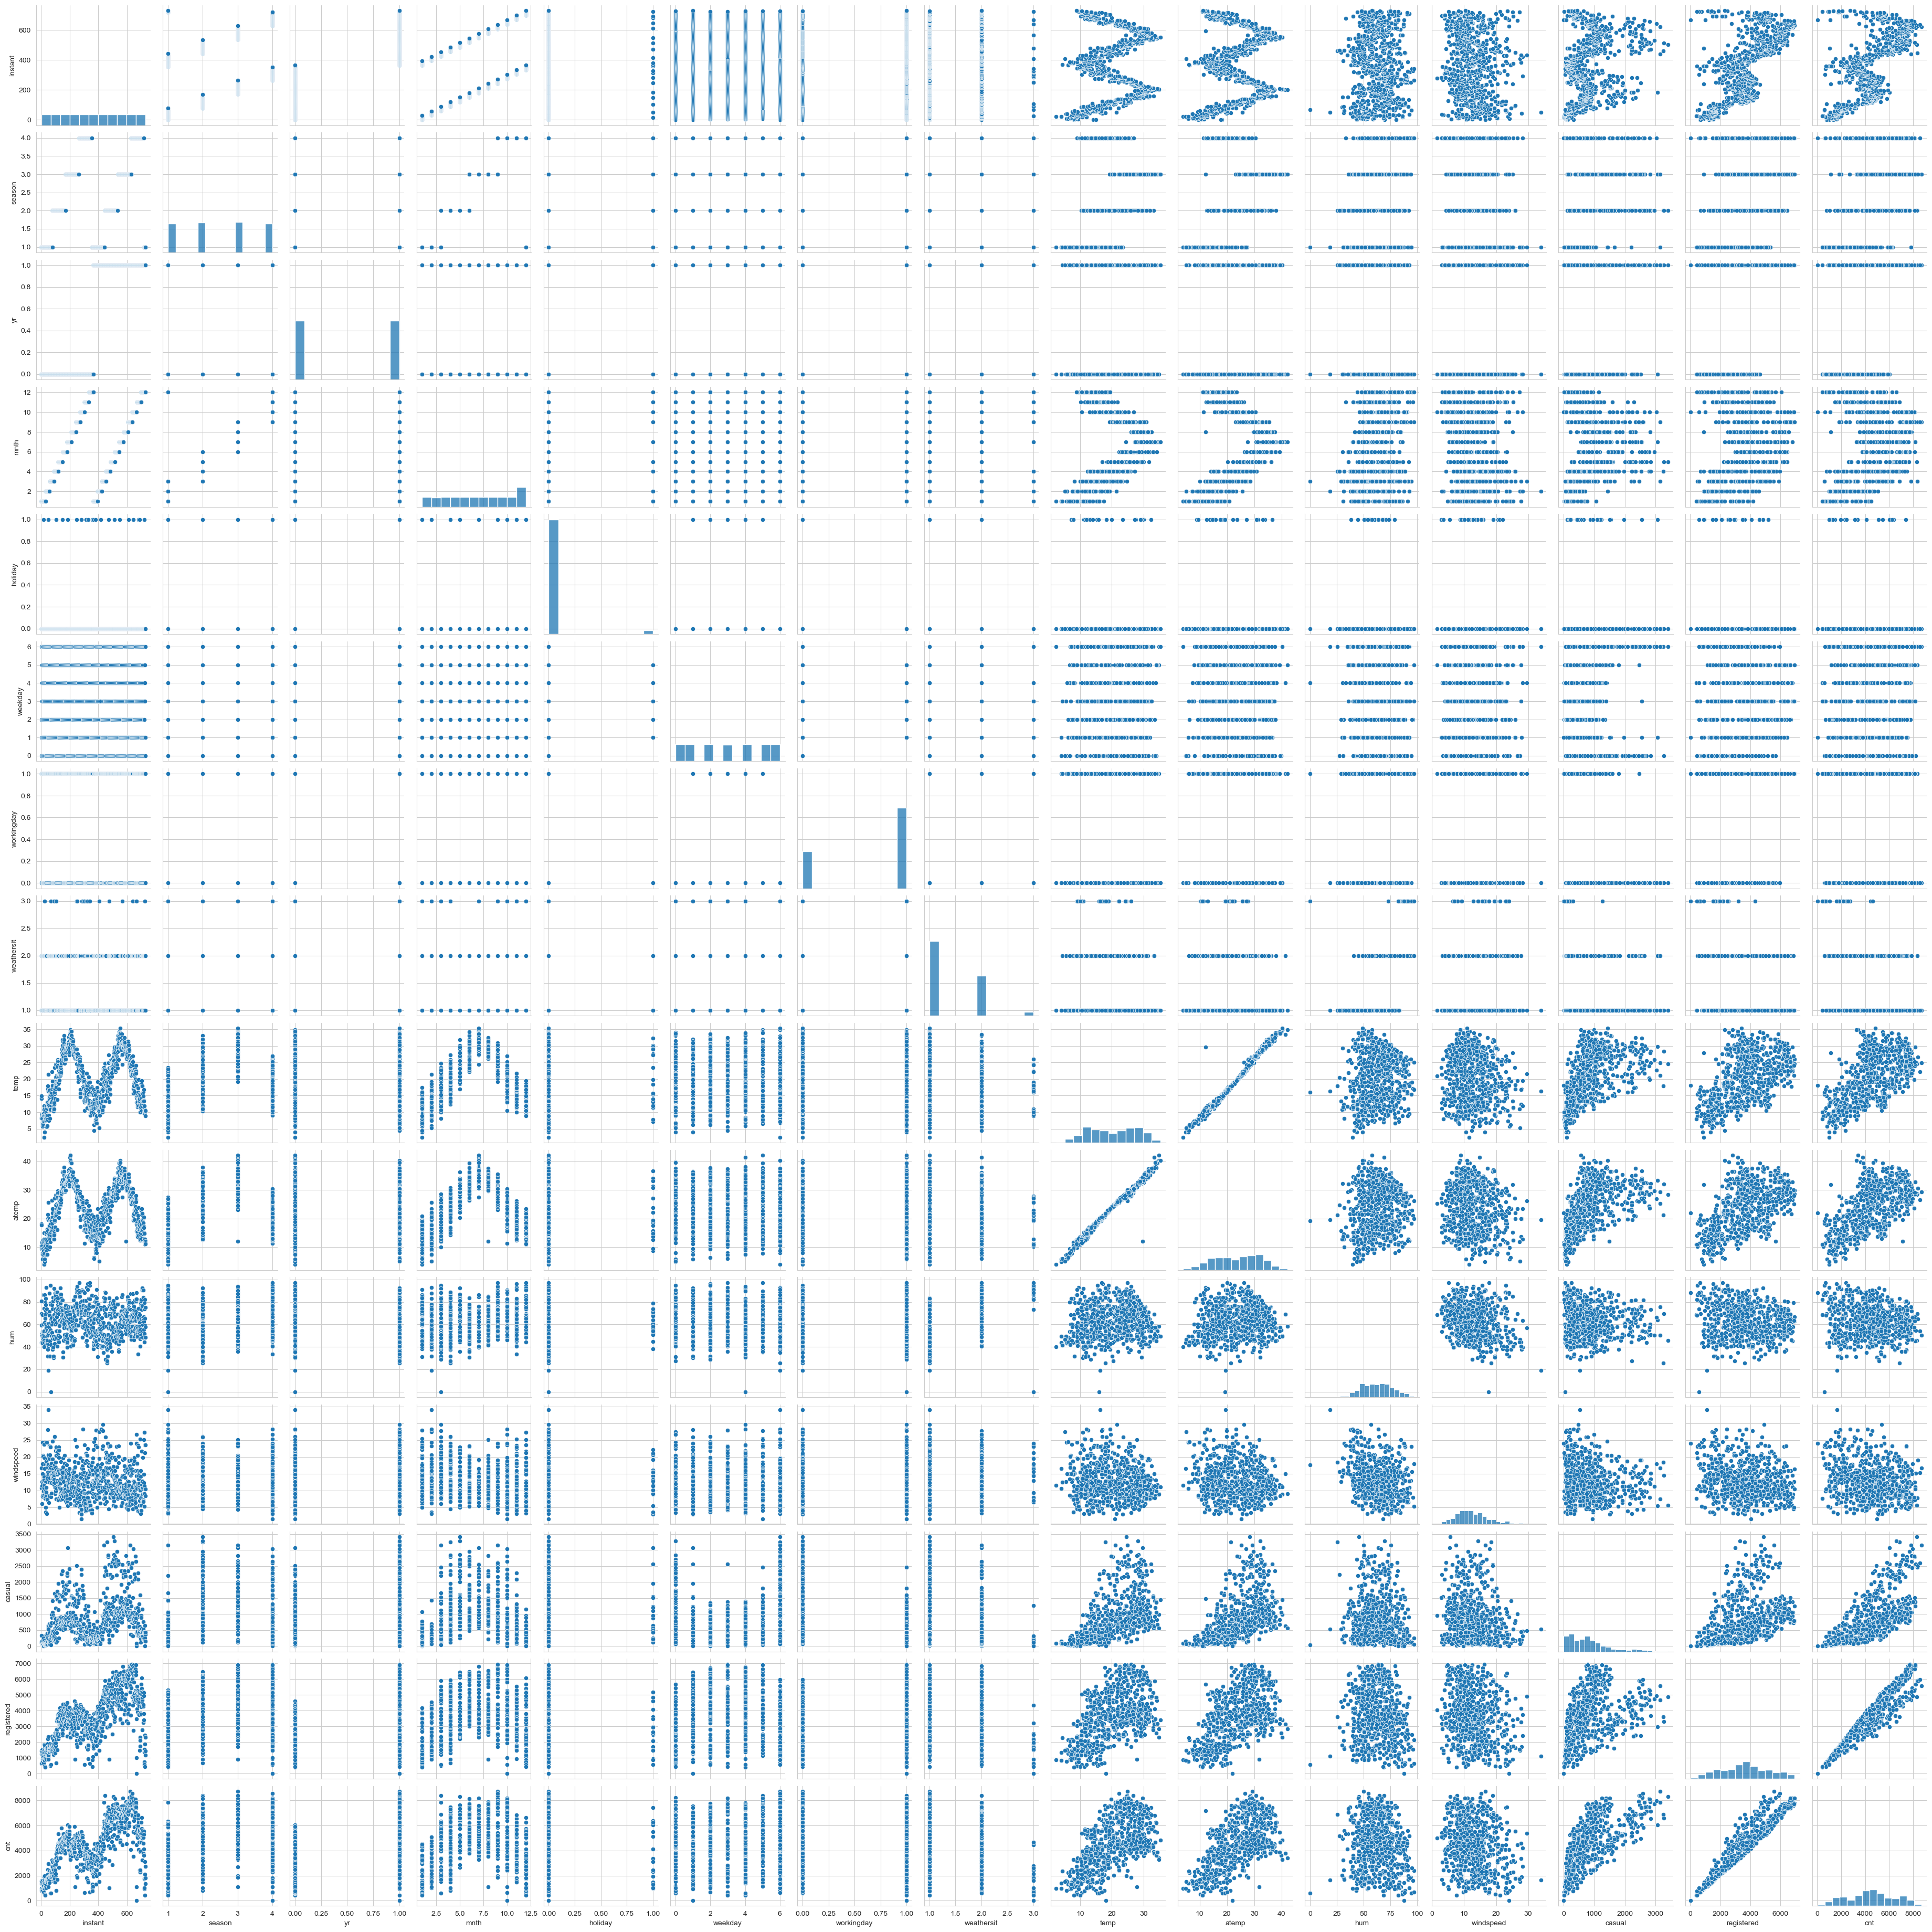

In [71]:
#Plot the data and visualize 
plt.figure(figsize = (300,150))
sns.pairplot(data_set)
plt.show()

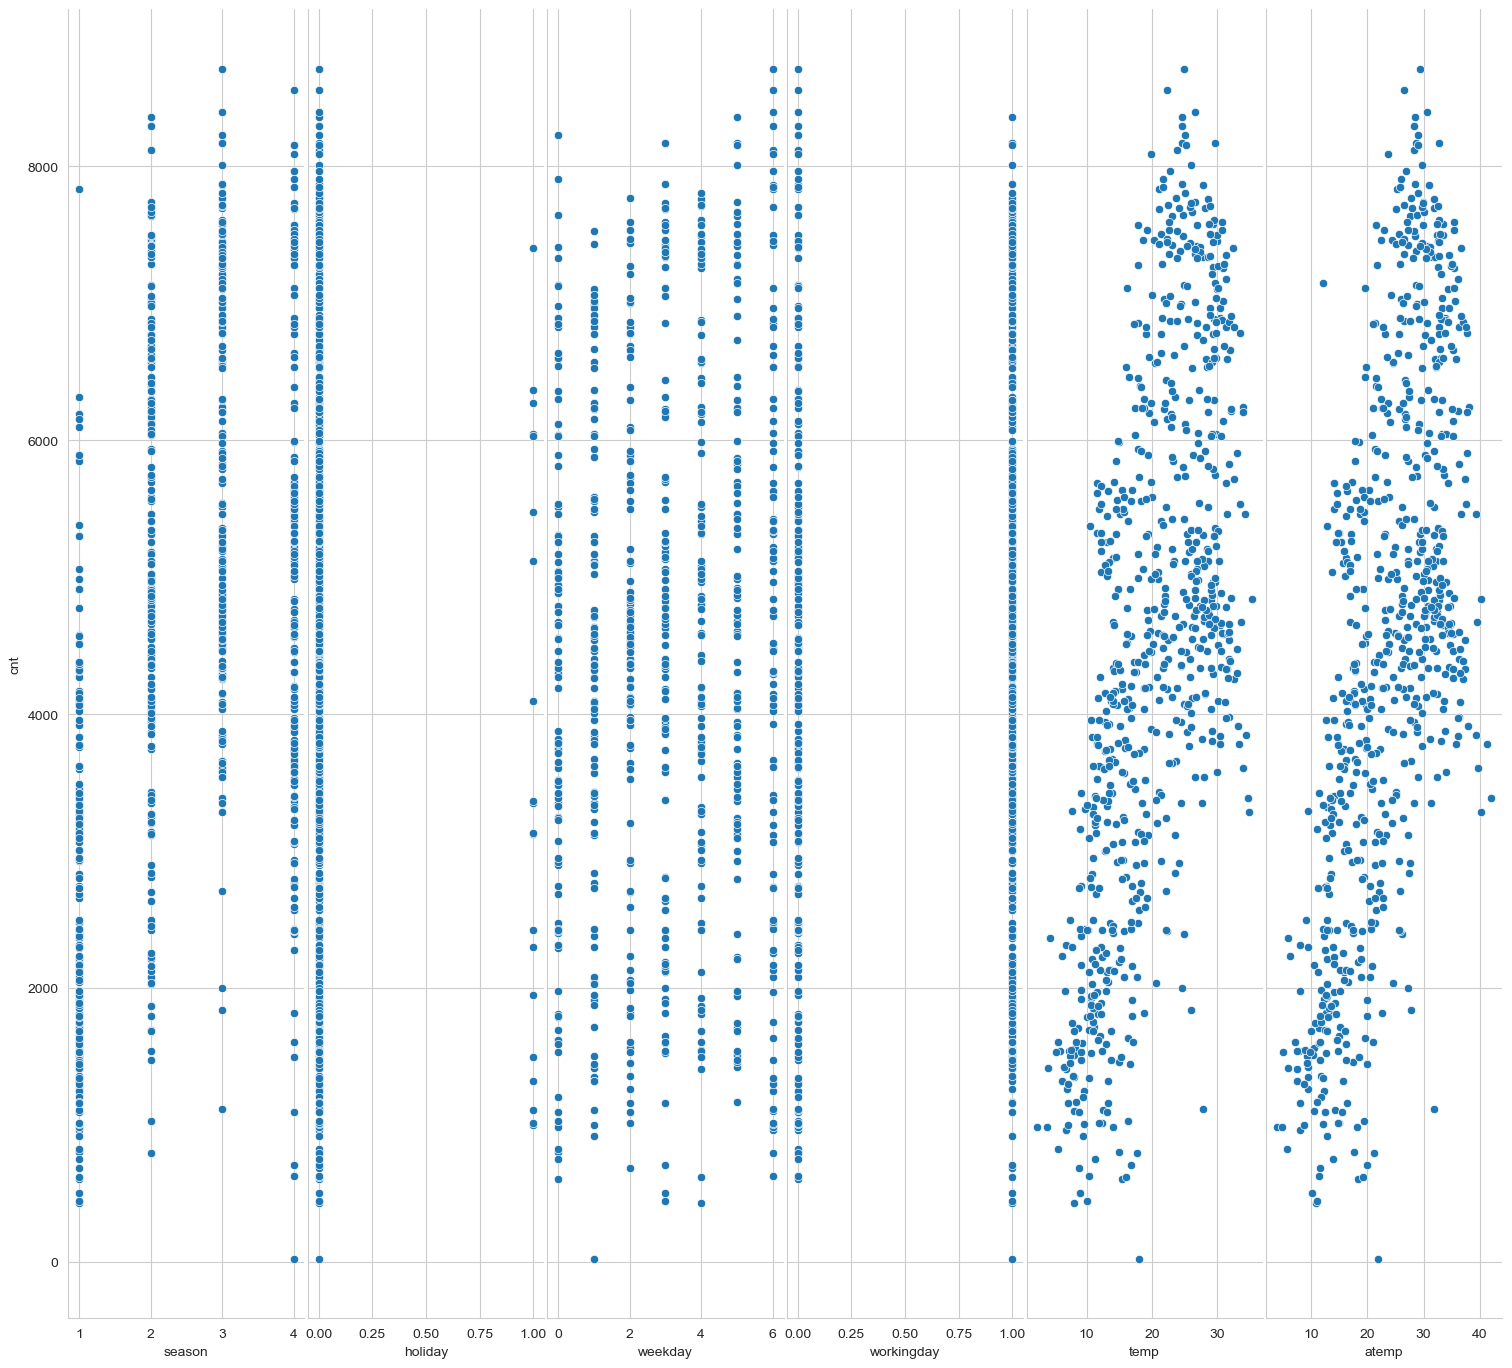

In [72]:

sns.set_style("whitegrid")
g = sns.pairplot(data=data_set,x_vars=['season','holiday','weekday','workingday','temp','atemp'],y_vars='cnt',kind='scatter',height=5,aspect=1);        
g.fig.set_size_inches(15,15)        
             
             

From the above, we can make the below inferences:
1. The distribution of bike rentals across seasons seem be uniformly distributed 
2. Clearly the rental of bikes is more on non holidays when compared to holidays
3. The distribution of rentals acorss the weekday seems to be uniformly distributed
4. The number of rentals per day seem to be increasing with temperature and adjusted temperature
5. Working day or non working day, the rental distribution seems consistent. Compared to point no 2, this would imply a weekday which is non working, will also result in good rental numbers. 


/var/folders/cq/3_v0kxk56d79810f6w5gbnkr0000gn/T/ipykernel_43846/1106281720.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_set['cnt'])


<AxesSubplot:xlabel='cnt', ylabel='Density'>

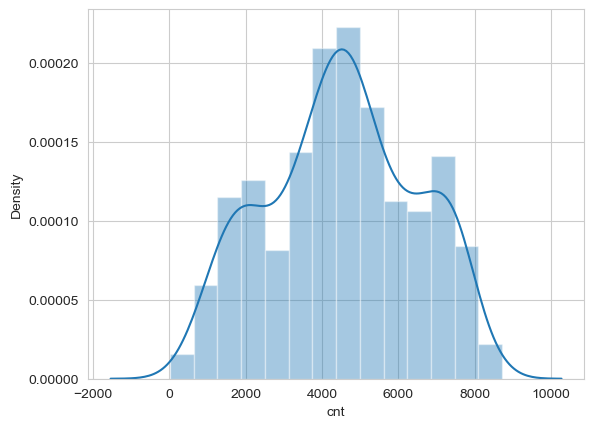

In [73]:
sns.distplot(data_set['cnt'])

# Data Cleansing 

By doing intial checks, we realise that the data can be cleansed to better fit our analysis. This section will focus on activities around the same. 

In [74]:
#Instant is a index variable. This will not add any value to our analysis hence we can drop the same. 

data_set.drop(['instant'],axis=1,inplace=True)
data_set.head()

dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0  01-01-2018       1   0     1        0        6           0           2   
1  02-01-2018       1   0     1        0        0           0           2   
2  03-01-2018       1   0     1        0        1           1           1   
3  04-01-2018       1   0     1        0        2           1           1   
4  05-01-2018       1   0     1        0        3           1           1   

        temp     atemp      hum  windspeed  casual  registered   cnt  
0  14.110847  18.18125  80.5833  10.749882     331         654   985  
1  14.902598  17.68695  69.6087  16.652113     131         670   801  
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349  
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562  
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600

In [75]:
#in the temp and atemp data, we see that there are some outliners. Hence, we can delete them from the data set

data_set = data_set.drop(index = data_set[(data_set['temp'] > 15) & (data_set['temp'] < 20) & (data_set['cnt'] < 100)].index)
data_set = data_set.drop(index = data_set[(data_set['temp'] > 25) & (data_set['temp'] < 30) & (data_set['cnt'] < 2000)].index)

data_set = data_set.drop(index = data_set[(data_set['atemp'] > 20) & (data_set['atemp'] < 25) & (data_set['cnt'] < 100)].index)
data_set = data_set.drop(index = data_set[(data_set['atemp'] > 30) & (data_set['atemp'] < 35) & (data_set['cnt'] < 2000)].index)


#outliers in hum
data_set = data_set.drop(index = data_set[(data_set['hum'] < 20)].index)

#outliers in windspeed
data_set = data_set.drop(index = data_set[(data_set['windspeed'] > 30)].index)

In [76]:
#we can see column dteday and yr month are having same data so we can drop dteday 

data_set.drop(['dteday'],axis=1,inplace=True)
data_set.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  
0  18.18125  80.5833  10.749882     331         654   985  
1  17.68695  69.6087  16.652113     131         670   801  
2   9.47025  43.7273  16.636703     120        1229  1349  
3  10.60610  59.0435  10.739832     108        1454  1562  
4  11.46350  43.6957  12.522300      82        1518  1600

In [77]:
#from the problem statement it is evident that cnt = casual + registered. Hence, we can delete these fields keepign cnt 
data_set.drop(['casual','registered'],axis=1,inplace=True)
data_set.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

# Analysing Categorical Variables 

We see that there are multiple categorical variables present in the data set. We can perform some kind of manipulation of this data to convert this to more consumable format. 

We will work on the below categorical variables:
1. season
2. Yr
3. mnth
4. holiday
5. weekday
6. workingday
7. weathersit 

We can replace them with approrpiate values that can be used in our analysis. 

In [78]:
#handlign the season 
data_set['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
data_set.head(10)

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0  spring   0     1        0        6           0           2  14.110847   
1  spring   0     1        0        0           0           2  14.902598   
2  spring   0     1        0        1           1           1   8.050924   
3  spring   0     1        0        2           1           1   8.200000   
4  spring   0     1        0        3           1           1   9.305237   
5  spring   0     1        0        4           1           1   8.378268   
6  spring   0     1        0        5           1           2   8.057402   
7  spring   0     1        0        6           0           2   6.765000   
8  spring   0     1        0        0           0           1   5.671653   
9  spring   0     1        0        1           1           1   6.184153   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600  
5  11.66045  51.8261   6.000868  1606  
6  10.44195  49.8696  11.304642  1510  
7   8.11270  53.5833  17.875868   959  
8   5.80875  43.4167  24.250650   822  
9   7.54440  48.2917  14.958889  1321

In [79]:
#handling weathersi

data_set['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
data_set.head()

season  yr  mnth  holiday  weekday  workingday        weathersit  \
0  spring   0     1        0        6           0       Mist_cloudy   
1  spring   0     1        0        0           0       Mist_cloudy   
2  spring   0     1        0        1           1  Clear_Few Clouds   
3  spring   0     1        0        2           1  Clear_Few Clouds   
4  spring   0     1        0        3           1  Clear_Few Clouds   

        temp     atemp      hum  windspeed   cnt  
0  14.110847  18.18125  80.5833  10.749882   985  
1  14.902598  17.68695  69.6087  16.652113   801  
2   8.050924   9.47025  43.7273  16.636703  1349  
3   8.200000  10.60610  59.0435  10.739832  1562  
4   9.305237  11.46350  43.6957  12.522300  1600

In [80]:
#handling weekday

data_set['weekday'].replace({0:"sunday",1:"monday",2:"tuesday",3:"wednesday",4:"thursday",5:"friday",6:"saturday"},inplace=True)
data_set.head(10)

season  yr  mnth  holiday    weekday  workingday        weathersit  \
0  spring   0     1        0   saturday           0       Mist_cloudy   
1  spring   0     1        0     sunday           0       Mist_cloudy   
2  spring   0     1        0     monday           1  Clear_Few Clouds   
3  spring   0     1        0    tuesday           1  Clear_Few Clouds   
4  spring   0     1        0  wednesday           1  Clear_Few Clouds   
5  spring   0     1        0   thursday           1  Clear_Few Clouds   
6  spring   0     1        0     friday           1       Mist_cloudy   
7  spring   0     1        0   saturday           0       Mist_cloudy   
8  spring   0     1        0     sunday           0  Clear_Few Clouds   
9  spring   0     1        0     monday           1  Clear_Few Clouds   

        temp     atemp      hum  windspeed   cnt  
0  14.110847  18.18125  80.5833  10.749882   985  
1  14.902598  17.68695  69.6087  16.652113   801  
2   8.050924   9.47025  43.7273  16.636703  1349  
3   8.200000  10.60610  59.0435  10.739832  1562  
4   9.305237  11.46350  43.6957  12.522300  1600  
5   8.378268  11.66045  51.8261   6.000868  1606  
6   8.057402  10.44195  49.8696  11.304642  1510  
7   6.765000   8.11270  53.5833  17.875868   959  
8   5.671653   5.80875  43.4167  24.250650   822  
9   6.184153   7.54440  48.2917  14.958889  1321

In [81]:
#handling weekday
#commenting this code as this resulting in incorrect analysis.
#data_set['yr'].replace({0:"2018",1:"2019"},inplace=True)
#data_set.head(10)




In [82]:
#handling weekday

data_set['mnth'].replace({    1 : 'january',
    2 : 'february',
    3 : 'march',
    4 : 'april',
    5 : 'may',
    6 : 'june',
    7 : 'july',
    8 : 'august',
    9 : 'september',
    10 : 'october',
    11 : 'november',
    12 : 'december'},inplace=True)
data_set.head(10)

season  yr     mnth  holiday    weekday  workingday        weathersit  \
0  spring   0  january        0   saturday           0       Mist_cloudy   
1  spring   0  january        0     sunday           0       Mist_cloudy   
2  spring   0  january        0     monday           1  Clear_Few Clouds   
3  spring   0  january        0    tuesday           1  Clear_Few Clouds   
4  spring   0  january        0  wednesday           1  Clear_Few Clouds   
5  spring   0  january        0   thursday           1  Clear_Few Clouds   
6  spring   0  january        0     friday           1       Mist_cloudy   
7  spring   0  january        0   saturday           0       Mist_cloudy   
8  spring   0  january        0     sunday           0  Clear_Few Clouds   
9  spring   0  january        0     monday           1  Clear_Few Clouds   

        temp     atemp      hum  windspeed   cnt  
0  14.110847  18.18125  80.5833  10.749882   985  
1  14.902598  17.68695  69.6087  16.652113   801  
2   8.050924   9.47025  43.7273  16.636703  1349  
3   8.200000  10.60610  59.0435  10.739832  1562  
4   9.305237  11.46350  43.6957  12.522300  1600  
5   8.378268  11.66045  51.8261   6.000868  1606  
6   8.057402  10.44195  49.8696  11.304642  1510  
7   6.765000   8.11270  53.5833  17.875868   959  
8   5.671653   5.80875  43.4167  24.250650   822  
9   6.184153   7.54440  48.2917  14.958889  1321

In [83]:
#changing datatypes of numerical columns to appropriate types

data_set[['temp','hum','windspeed','cnt']]=data_set[['temp','hum','windspeed','cnt']].apply(pd.to_numeric)

# Training the data

Now, since we have cleaned the data and made it consumable, let us start the activities around the training of data. 

<AxesSubplot:>

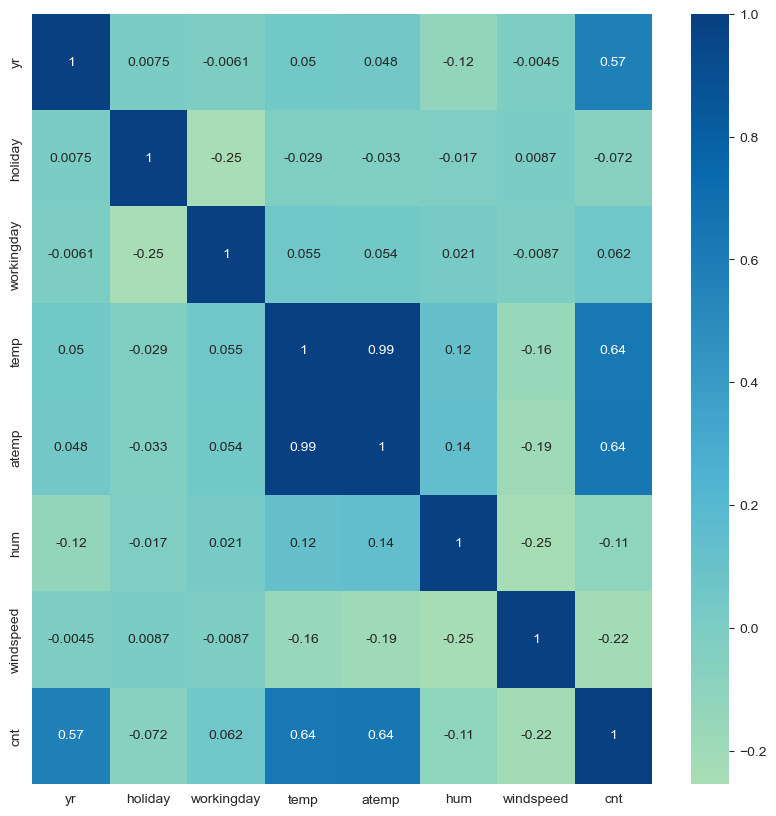

In [84]:
#lets check the correlation between the variables 

# correlation among variables
plt.figure(figsize=[10,10])
sns.heatmap(data_set.corr(),cmap='GnBu',center=0,annot=True)

From the above co-realation heat map, one thing that stands out is that the independent variables temp and atemp have a co-relation of 0.99. This is quite high and hence as per the linear regression principles, we will go ahead and remove one of them. 

In [85]:
#dropping atemp

data_set = data_set.drop(columns=['atemp'])
data_set.head()

season  yr     mnth  holiday    weekday  workingday        weathersit  \
0  spring   0  january        0   saturday           0       Mist_cloudy   
1  spring   0  january        0     sunday           0       Mist_cloudy   
2  spring   0  january        0     monday           1  Clear_Few Clouds   
3  spring   0  january        0    tuesday           1  Clear_Few Clouds   
4  spring   0  january        0  wednesday           1  Clear_Few Clouds   

        temp      hum  windspeed   cnt  
0  14.110847  80.5833  10.749882   985  
1  14.902598  69.6087  16.652113   801  
2   8.050924  43.7273  16.636703  1349  
3   8.200000  59.0435  10.739832  1562  
4   9.305237  43.6957  12.522300  1600

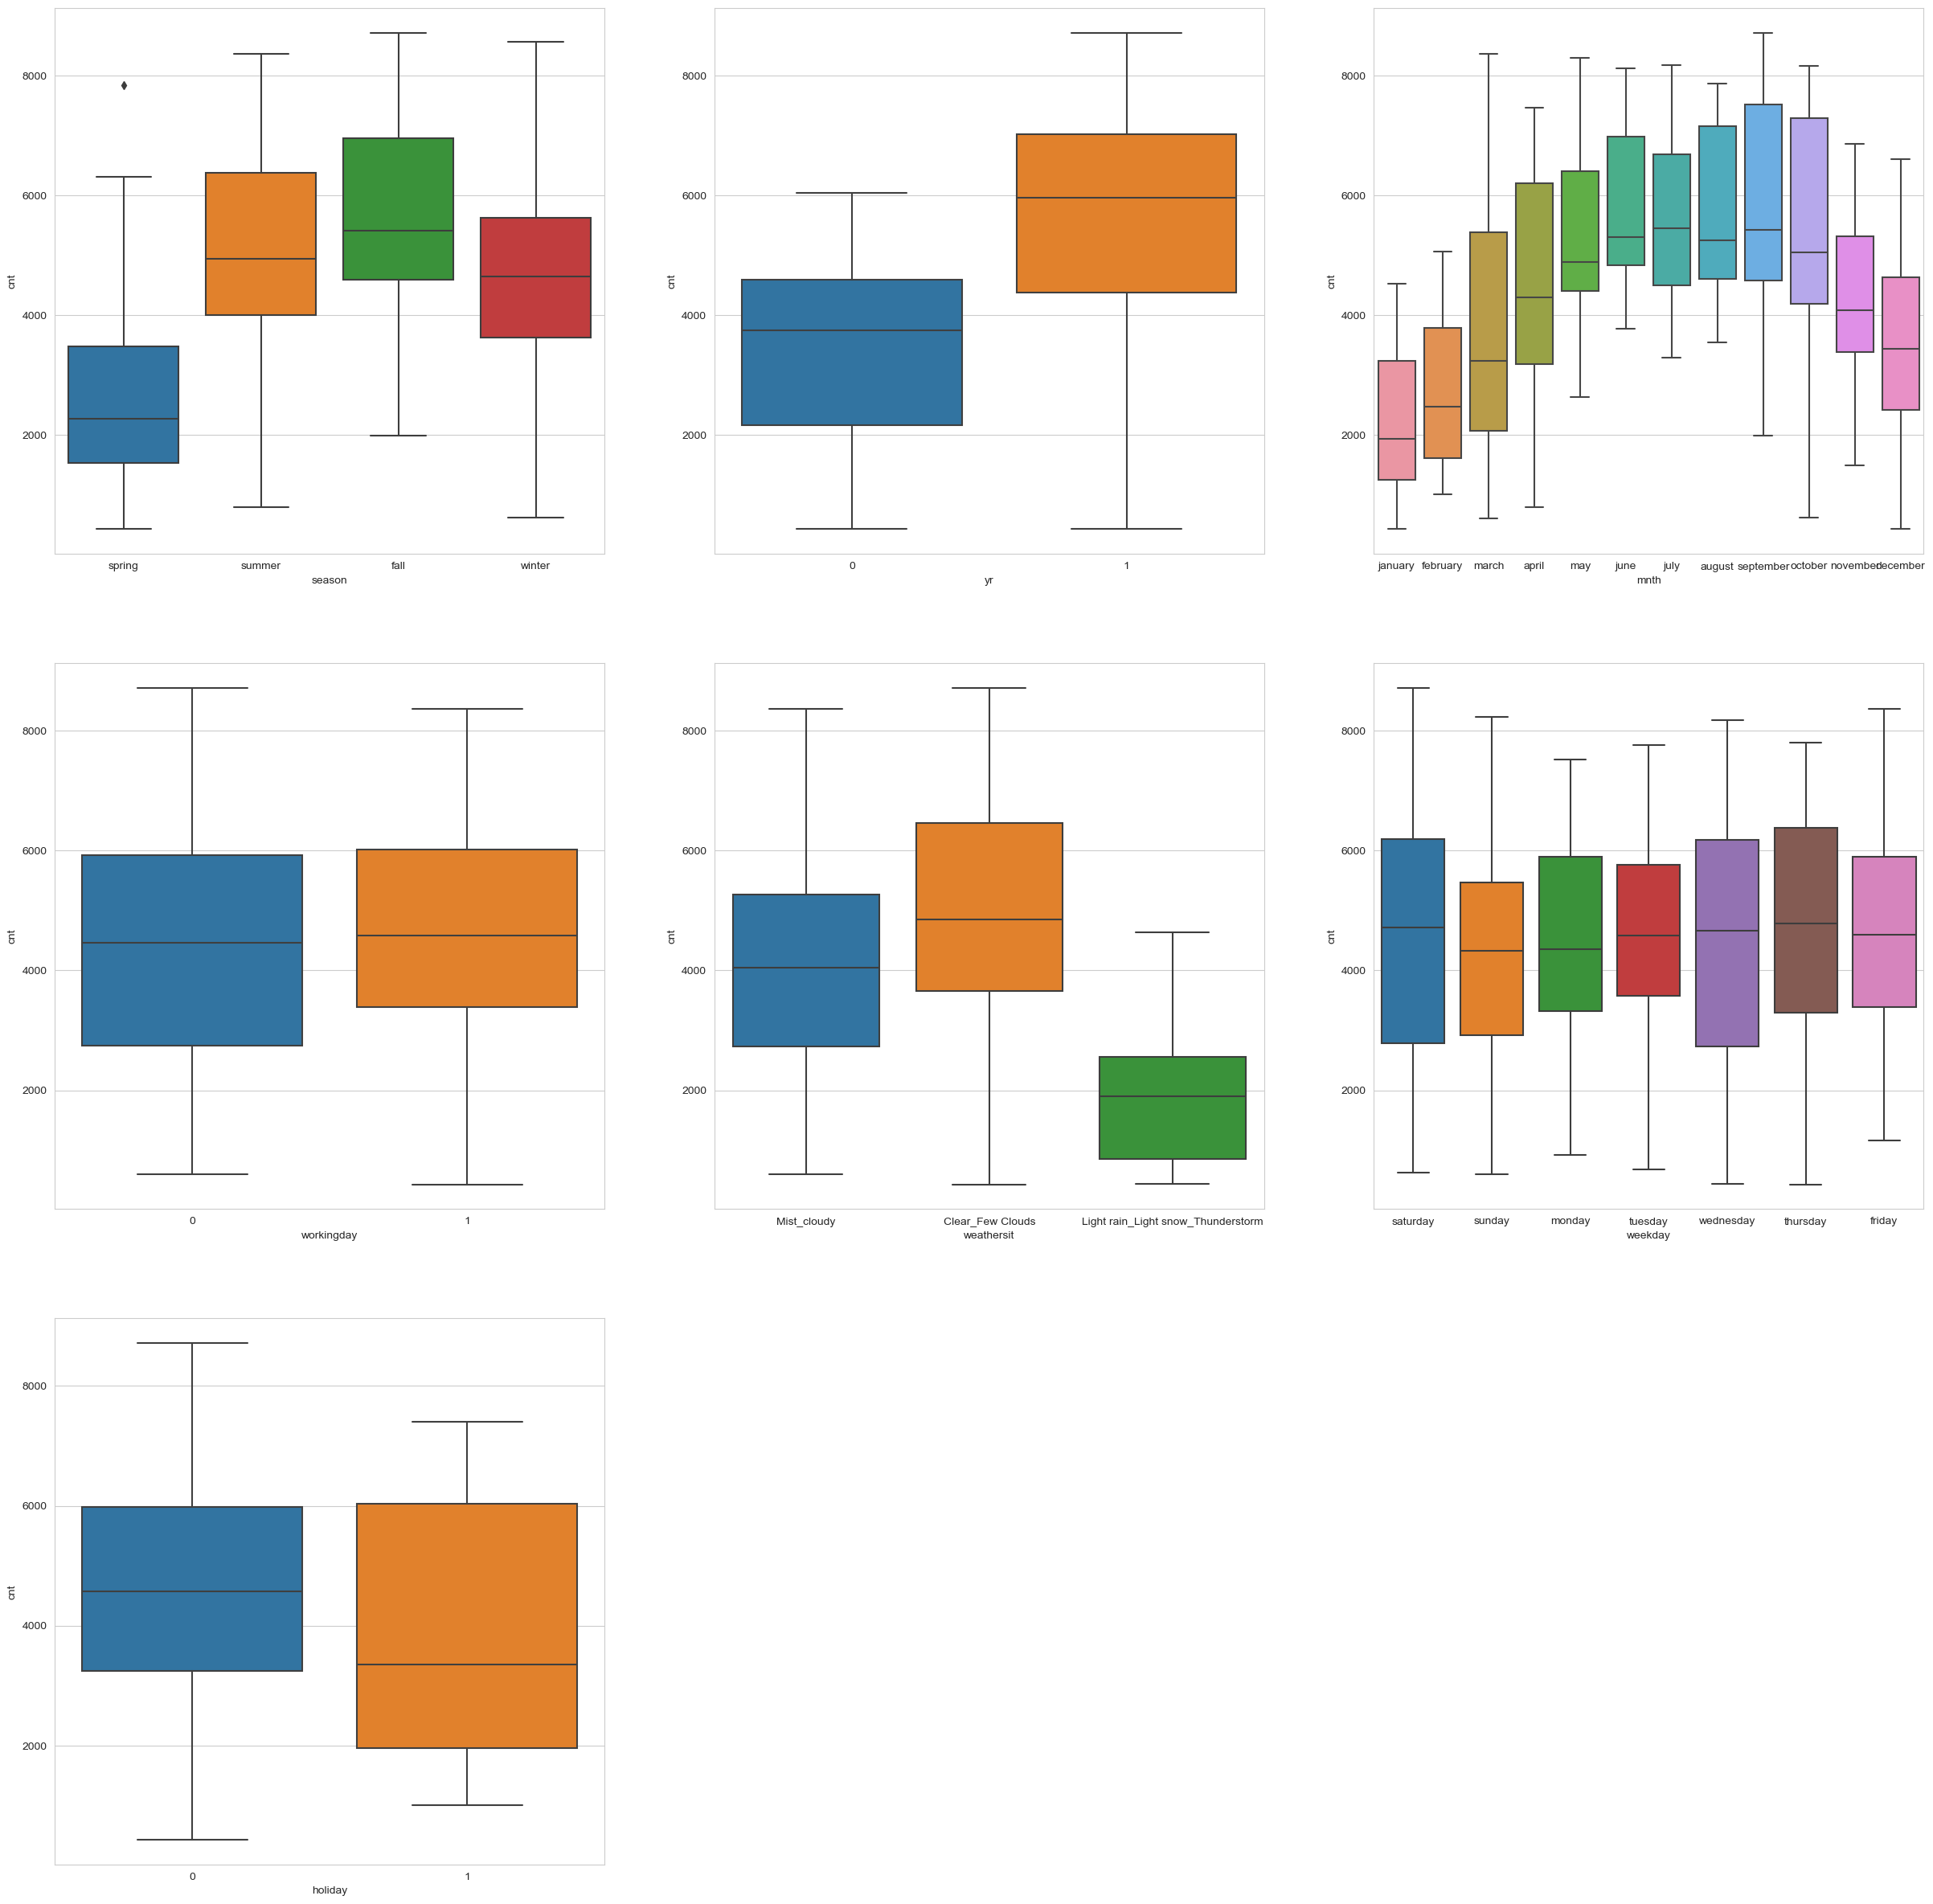

In [86]:
#Visualising categorical Variables 

plt.figure(figsize=(30, 30))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data_set)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = data_set)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = data_set)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = data_set)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data_set)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = data_set)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = data_set)
plt.show()

In [87]:
#creating dummy variables


#season
status = pd.get_dummies(data_set['season'], drop_first = True)
status.head()

spring  summer  winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0

In [88]:
#concate the dummy dataframe with origina 
data_set = pd.concat([data_set, status], axis = 1)
data_set.head()

season  yr     mnth  holiday    weekday  workingday        weathersit  \
0  spring   0  january        0   saturday           0       Mist_cloudy   
1  spring   0  january        0     sunday           0       Mist_cloudy   
2  spring   0  january        0     monday           1  Clear_Few Clouds   
3  spring   0  january        0    tuesday           1  Clear_Few Clouds   
4  spring   0  january        0  wednesday           1  Clear_Few Clouds   

        temp      hum  windspeed   cnt  spring  summer  winter  
0  14.110847  80.5833  10.749882   985       1       0       0  
1  14.902598  69.6087  16.652113   801       1       0       0  
2   8.050924  43.7273  16.636703  1349       1       0       0  
3   8.200000  59.0435  10.739832  1562       1       0       0  
4   9.305237  43.6957  12.522300  1600       1       0       0

In [89]:
#Deleting the orginal columns season.weathersit,weekday,mnth
data_set.drop(['season'],axis=1,inplace=True)
data_set.head()

yr     mnth  holiday    weekday  workingday        weathersit       temp  \
0   0  january        0   saturday           0       Mist_cloudy  14.110847   
1   0  january        0     sunday           0       Mist_cloudy  14.902598   
2   0  january        0     monday           1  Clear_Few Clouds   8.050924   
3   0  january        0    tuesday           1  Clear_Few Clouds   8.200000   
4   0  january        0  wednesday           1  Clear_Few Clouds   9.305237   

       hum  windspeed   cnt  spring  summer  winter  
0  80.5833  10.749882   985       1       0       0  
1  69.6087  16.652113   801       1       0       0  
2  43.7273  16.636703  1349       1       0       0  
3  59.0435  10.739832  1562       1       0       0  
4  43.6957  12.522300  1600       1       0       0

In [90]:
#weathersit
status = pd.get_dummies(data_set['weathersit'], drop_first = True)
data_set = pd.concat([data_set, status], axis = 1)
data_set.drop(['weathersit'],axis=1,inplace=True)
data_set.head()

yr     mnth  holiday    weekday  workingday       temp      hum  windspeed  \
0   0  january        0   saturday           0  14.110847  80.5833  10.749882   
1   0  january        0     sunday           0  14.902598  69.6087  16.652113   
2   0  january        0     monday           1   8.050924  43.7273  16.636703   
3   0  january        0    tuesday           1   8.200000  59.0435  10.739832   
4   0  january        0  wednesday           1   9.305237  43.6957  12.522300   

    cnt  spring  summer  winter  Light rain_Light snow_Thunderstorm  \
0   985       1       0       0                                   0   
1   801       1       0       0                                   0   
2  1349       1       0       0                                   0   
3  1562       1       0       0                                   0   
4  1600       1       0       0                                   0   

   Mist_cloudy  
0            1  
1            1  
2            0  
3            0  
4            0

In [91]:
#mnth, weekday
month= pd.get_dummies(data_set['mnth'],drop_first=True)
weekday= pd.get_dummies(data_set['weekday'],drop_first=True)
data_set = pd.concat([data_set, month], axis = 1)
data_set = pd.concat([data_set, weekday], axis = 1)
data_set.drop(['mnth'],axis=1,inplace=True)
data_set.drop(['weekday'],axis=1,inplace=True)
data_set.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  spring  \
0   0        0           0  14.110847  80.5833  10.749882   985       1   
1   0        0           0  14.902598  69.6087  16.652113   801       1   
2   0        0           1   8.050924  43.7273  16.636703  1349       1   
3   0        0           1   8.200000  59.0435  10.739832  1562       1   
4   0        0           1   9.305237  43.6957  12.522300  1600       1   

   summer  winter  ...  may  november  october  september  monday  saturday  \
0       0       0  ...    0         0        0          0       0         1   
1       0       0  ...    0         0        0          0       0         0   
2       0       0  ...    0         0        0          0       1         0   
3       0       0  ...    0         0        0          0       0         0   
4       0       0  ...    0         0        0          0       0         0   

   sunday  thursday  tuesday  wednesday  
0       0         0        0          0  
1       1         0        0          0  
2       0         0        0          0  
3       0         0        1          0  
4       0         0        0          1  

[5 rows x 29 columns]

### Test and Tran Split 

In [92]:
# We specify this so that the train and test data set always have the same rows, respectively

data_set_train, data_set_test = train_test_split(data_set, train_size = 0.7, random_state = 100)
print(data_set_train.shape)
print(data_set_test.shape)

(507, 29)
(218, 29)


### Scaling numerical variables

In [93]:
#temp, hum, windspeed and cnt

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
num_vars=['temp','hum','windspeed','cnt']
data_set_train[num_vars] = scaler.fit_transform(data_set_train[num_vars])

In [94]:
data_set_train.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  spring  \
641   1        0           1  0.745598  0.634311   0.227006  0.832669       0   
728   1        0           0  0.245101  0.283272   0.783361  0.164795       1   
478   1        0           1  0.441354  0.240538   0.541524  0.628033       0   
113   0        0           0  0.651106  0.763125   0.405045  0.453942       0   
685   1        0           0  0.331287  0.374237   0.375353  0.627550       0   

     summer  winter  ...  may  november  october  september  monday  saturday  \
641       0       1  ...    0         0        1          0       0         0   
728       0       0  ...    0         0        0          0       0         0   
478       1       0  ...    0         0        0          0       0         0   
113       1       0  ...    0         0        0          0       0         0   
685       0       1  ...    0         1        0          0       0         1   

     sunday  thursday  tuesday  wednesday  
641       0         1        0          0  
728       1         0        0          0  
478       0         0        1          0  
113       1         0        0          0  
685       0         0        0          0  

[5 rows x 29 columns]

In [95]:
data_set_train.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  507.000000  507.000000  507.000000  507.000000  507.000000  507.000000   
mean     0.508876    0.025641    0.684418    0.537775    0.494840    0.400867   
std      0.500415    0.158218    0.465206    0.227165    0.205650    0.177827   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.336479    0.336386    0.272258   
50%      1.000000    0.000000    1.000000    0.538962    0.486702    0.387203   
75%      1.000000    0.000000    1.000000    0.736253    0.643773    0.499984   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt      spring      summer      winter  ...         may  \
count  507.000000  507.000000  507.000000  507.000000  ...  507.000000   
mean     0.495879    0.248521    0.240631    0.254438  ...    0.090730   
std      0.236618    0.432582    0.427889    0.435975  ...    0.287508   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.328504    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.497042    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.673729    0.000000    0.000000    1.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

         november     october   september      monday    saturday      sunday  \
count  507.000000  507.000000  507.000000  507.000000  507.000000  507.000000   
mean     0.094675    0.078895    0.084813    0.149901    0.140039    0.149901   
std      0.293054    0.269842    0.278878    0.357327    0.347371    0.357327   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         thursday     tuesday   wednesday  
count  507.000000  507.000000  507.000000  
mean     0.140039    0.140039    0.128205  
std      0.347371    0.347371    0.334648  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 29 columns]

In [96]:
#create X and Y

y_train = data_set_train.pop('cnt')
X_train = data_set_train

In [97]:
X_train.head()

yr  holiday  workingday      temp       hum  windspeed  spring  summer  \
641   1        0           1  0.745598  0.634311   0.227006       0       0   
728   1        0           0  0.245101  0.283272   0.783361       1       0   
478   1        0           1  0.441354  0.240538   0.541524       0       1   
113   0        0           0  0.651106  0.763125   0.405045       0       1   
685   1        0           0  0.331287  0.374237   0.375353       0       0   

     winter  Light rain_Light snow_Thunderstorm  ...  may  november  october  \
641       1                                   0  ...    0         0        1   
728       0                                   0  ...    0         0        0   
478       0                                   0  ...    0         0        0   
113       0                                   0  ...    0         0        0   
685       1                                   0  ...    0         1        0   

     september  monday  saturday  sunday  thursday  tuesday  wednesday  
641          0       0         0       0         1        0          0  
728          0       0         0       1         0        0          0  
478          0       0         0       0         0        1          0  
113          0       0         0       1         0        0          0  
685          0       0         1       0         0        0          0  

[5 rows x 28 columns]

In [98]:
y_train.head()

641    0.832669
728    0.164795
478    0.628033
113    0.453942
685    0.627550
Name: cnt, dtype: float64

In [99]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Light rain_Light snow_Thunderstorm', 'Mist_cloudy',
       'august', 'december', 'february', 'january', 'july', 'june', 'march',
       'may', 'november', 'october', 'september', 'monday', 'saturday',
       'sunday', 'thursday', 'tuesday', 'wednesday'],
      dtype='object')

### Using OLS method for training

We will use the OLS approach to build the training. We will consider all the variables and then eilimate the ones that are not fitting right for the training. The logic we will follow are as below: 

- HIGH P and HIGH VIF - Simple, we need to drop it
- HIGH P and LOW VIF - First remove this type and check the change in VIF
- LOW P and HIGH VIF - Remove this after previous 
- LOW P and LOW VIF - Simple, we need to keep it 

In [100]:
#add a constant for stats model 
X_train_sm = sm.add_constant(X_train)

In [101]:
#create the first model 
lr = sm.OLS(y_train, X_train_sm.astype(float))

In [102]:
#fit
lr_model = lr.fit()
#params
lr_model.params

const                                 0.191586
yr                                    0.243524
holiday                               0.008653
workingday                            0.077266
temp                                  0.473973
hum                                  -0.140656
windspeed                            -0.116680
spring                               -0.088383
summer                                0.019951
winter                                0.104952
Light rain_Light snow_Thunderstorm   -0.179680
Mist_cloudy                          -0.052799
august                                0.010078
december                             -0.055962
february                             -0.017746
january                              -0.046693
july                                 -0.027277
june                                 -0.002026
march                                 0.014527
may                                   0.038948
november                             -0.065237
october      

In [103]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     109.3
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          1.10e-185
Time:                        14:06:54   Log-Likelihood:                 510.99
No. Observations:                 507   AIC:                            -966.0
Df Residuals:                     479   BIC:                            -847.6
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1916      0.034      5.565      0.000       0.124       0.259
yr                                     0.2435      0.008     28.915      0.000       0.227       0.260
holiday                                0.0087      0.024      0.360      0.719      -0.039       0.056
workingday                             0.0773      0.012      6.286      0.000       0.053       0.101
temp                                   0.4740      0.047     10.032      0.000       0.381       0.567
hum                                   -0.1407      0.030     -4.682      0.000      -0.200      -0.082
windspeed                             -0.1167      0.025     -4.680      0.000      -0.166      -0.068
spring                                -0.0884      0.030     -2.910      0.004      -0.148      -0.029
summer                                 0.0200      0.027      0.749      0.454      -0.032       0.072
winter                                 0.1050      0.027      3.943      0.000       0.053       0.157
Light rain_Light snow_Thunderstorm    -0.1797      0.036     -5.060      0.000      -0.249      -0.110
Mist_cloudy                           -0.0528      0.011     -4.655      0.000      -0.075      -0.031
august                                 0.0101      0.034      0.293      0.770      -0.058       0.078
december                              -0.0560      0.035     -1.622      0.106      -0.124       0.012
february                              -0.0177      0.034     -0.515      0.607      -0.085       0.050
january                               -0.0467      0.035     -1.337      0.182      -0.115       0.022
july                                  -0.0273      0.036     -0.767      0.444      -0.097       0.043
june                                  -0.0020      0.026     -0.078      0.938      -0.053       0.049
march                                  0.0145      0.026      0.548      0.584      -0.038       0.067
may                                    0.0389      0.022      1.807      0.071      -0.003       0.081
november                              -0.0652      0.037     -1.765      0.078      -0.138       0.007
october                                0.0147      0.037      0.403      0.687      -0.057       0.086
september                              0.0831      0.032      2.561      0.011       0.019       0.147
monday                                -0.0244      0.015     -1.616      0.107      -0.054       0.005
saturday                               0.0760      0.014      5.500      0.000       0.049       0.103
sunday                                 0.0297      0.014      2.154      0.032       0.003       0.057
thursday                              -0.0142      0.015     -0.939      0.348      -0.044      

### VIF - colinearity between variables 

In [104]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [105]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values.astype(float), i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                           workingday  78.99
24                              sunday  17.22
23                            saturday  16.01
6                               spring  10.58
8                               winter   8.25
7                               summer   7.96
19                            november   7.19
3                                 temp   7.06
14                             january   6.18
20                             october   5.95
11                              august   5.76
12                            december   5.68
15                                july   5.65
21                           september   5.01
13                            february   4.81
1                              holiday   4.11
17                               march   3.56
16                                june   2.86
18                                 may   2.35
4                                  hum   2.34
10                         Mist_cloudy   1.82
22                              monday   1.78
25                            thursday   1.68
26                             tuesday   1.68
27                           wednesday   1.64
9   Light rain_Light snow_Thunderstorm   1.35
5                            windspeed   1.20
0                                   yr   1.09

In [106]:
X_train.head()

yr  holiday  workingday      temp       hum  windspeed  spring  summer  \
641   1        0           1  0.745598  0.634311   0.227006       0       0   
728   1        0           0  0.245101  0.283272   0.783361       1       0   
478   1        0           1  0.441354  0.240538   0.541524       0       1   
113   0        0           0  0.651106  0.763125   0.405045       0       1   
685   1        0           0  0.331287  0.374237   0.375353       0       0   

     winter  Light rain_Light snow_Thunderstorm  ...  may  november  october  \
641       1                                   0  ...    0         0        1   
728       0                                   0  ...    0         0        0   
478       0                                   0  ...    0         0        0   
113       0                                   0  ...    0         0        0   
685       1                                   0  ...    0         1        0   

     september  monday  saturday  sunday  thursday  tuesday  wednesday  
641          0       0         0       0         1        0          0  
728          0       0         0       1         0        0          0  
478          0       0         0       0         0        1          0  
113          0       0         0       1         0        0          0  
685          0       0         1       0         0        0          0  

[5 rows x 28 columns]

In [107]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('wednesday', axis = 1)
#build a variable with all the variables 

X_train_sm = sm.add_constant(X)

#create the first model 
lr = sm.OLS(y_train, X_train_sm.astype(float))

#fit
lr_model = lr.fit()

#params
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     113.8
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          1.04e-186
Time:                        14:08:06   Log-Likelihood:                 510.97
No. Observations:                 507   AIC:                            -967.9
Df Residuals:                     480   BIC:                            -853.8
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1910      0.034      5.572      0.000       0.124       0.258
yr                                     0.2436      0.008     28.951      0.000       0.227       0.260
holiday                                0.0078      0.024      0.328      0.743      -0.039       0.054
workingday                             0.0764      0.012      6.622      0.000       0.054       0.099
temp                                   0.4738      0.047     10.040      0.000       0.381       0.567
hum                                   -0.1408      0.030     -4.692      0.000      -0.200      -0.082
windspeed                             -0.1168      0.025     -4.690      0.000      -0.166      -0.068
spring                                -0.0882      0.030     -2.908      0.004      -0.148      -0.029
summer                                 0.0201      0.027      0.757      0.449      -0.032       0.072
winter                                 0.1050      0.027      3.948      0.000       0.053       0.157
Light rain_Light snow_Thunderstorm    -0.1801      0.035     -5.088      0.000      -0.250      -0.111
Mist_cloudy                           -0.0527      0.011     -4.655      0.000      -0.075      -0.030
august                                 0.0102      0.034      0.298      0.766      -0.057       0.078
december                              -0.0560      0.034     -1.625      0.105      -0.124       0.012
february                              -0.0179      0.034     -0.521      0.603      -0.086       0.050
january                               -0.0469      0.035     -1.343      0.180      -0.115       0.022
july                                  -0.0270      0.035     -0.759      0.448      -0.097       0.043
june                                  -0.0018      0.026     -0.071      0.944      -0.053       0.049
march                                  0.0145      0.026      0.548      0.584      -0.038       0.067
may                                    0.0389      0.022      1.806      0.072      -0.003       0.081
november                              -0.0652      0.037     -1.765      0.078      -0.138       0.007
october                                0.0149      0.036      0.408      0.683      -0.057       0.087
september                              0.0832      0.032      2.568      0.011       0.020       0.147
monday                                -0.0229      0.013     -1.723      0.086      -0.049       0.003
saturday                               0.0766      0.014      5.668      0.000       0.050       0.103
sunday                                 0.0303      0.013      2.249      0.025       0.004       0.057
thursday                              -0.0127      0.013     -0.955      0.340      -0.039      

In [108]:
#recheck the VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                           workingday  76.91
24                              sunday  17.22
23                            saturday  16.01
6                               spring  10.57
8                               winter   8.25
7                               summer   7.95
19                            november   7.19
3                                 temp   7.06
14                             january   6.18
20                             october   5.94
11                              august   5.76
12                            december   5.68
15                                july   5.64
21                           september   5.01
13                            february   4.81
1                              holiday   4.03
17                               march   3.56
16                                june   2.85
18                                 may   2.35
4                                  hum   2.34
10                         Mist_cloudy   1.82
22                              monday   1.38
9   Light rain_Light snow_Thunderstorm   1.35
25                            thursday   1.31
26                             tuesday   1.30
5                            windspeed   1.20
0                                   yr   1.09

In [109]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('june', axis = 1)
#build a variable with all the variables 

X_train_sm = sm.add_constant(X)

#create the first model 
lr = sm.OLS(y_train, X_train_sm.astype(float))

#fit
lr_model = lr.fit()

#params
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     118.6
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          9.47e-188
Time:                        14:09:01   Log-Likelihood:                 510.97
No. Observations:                 507   AIC:                            -969.9
Df Residuals:                     481   BIC:                            -860.0
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1905      0.033      5.705      0.000       0.125       0.256
yr                                     0.2436      0.008     29.062      0.000       0.227       0.260
holiday                                0.0078      0.024      0.328      0.743      -0.039       0.054
workingday                             0.0762      0.011      6.739      0.000       0.054       0.098
temp                                   0.4724      0.043     11.019      0.000       0.388       0.557
hum                                   -0.1405      0.030     -4.726      0.000      -0.199      -0.082
windspeed                             -0.1166      0.025     -4.711      0.000      -0.165      -0.068
spring                                -0.0878      0.030     -2.943      0.003      -0.146      -0.029
summer                                 0.0207      0.025      0.819      0.413      -0.029       0.070
winter                                 0.1052      0.026      3.987      0.000       0.053       0.157
Light rain_Light snow_Thunderstorm    -0.1803      0.035     -5.110      0.000      -0.250      -0.111
Mist_cloudy                           -0.0528      0.011     -4.675      0.000      -0.075      -0.031
august                                 0.0119      0.026      0.463      0.644      -0.038       0.062
december                              -0.0553      0.033     -1.677      0.094      -0.120       0.010
february                              -0.0174      0.033     -0.519      0.604      -0.083       0.048
january                               -0.0464      0.034     -1.354      0.176      -0.114       0.021
july                                  -0.0252      0.026     -0.969      0.333      -0.076       0.026
march                                  0.0151      0.025      0.607      0.544      -0.034       0.064
may                                    0.0397      0.018      2.196      0.029       0.004       0.075
november                              -0.0644      0.035     -1.835      0.067      -0.133       0.005
october                                0.0159      0.034      0.474      0.636      -0.050       0.082
september                              0.0846      0.026      3.293      0.001       0.034       0.135
monday                                -0.0229      0.013     -1.727      0.085      -0.049       0.003
saturday                               0.0764      0.013      5.773      0.000       0.050       0.102
sunday                                 0.0301      0.013      2.284      0.023       0.004       0.056
thursday                              -0.0127      0.013     -0.954      0.341      -0.039       0.013
tuesday                               -0.0184      0.013     -1.392      0.165      -0.044      

In [110]:
#recheck the VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                           workingday  72.84
23                              sunday  16.24
22                            saturday  15.09
6                               spring  10.26
8                               winter   8.14
7                               summer   7.21
18                            november   6.50
14                             january   5.97
3                                 temp   5.84
12                            december   5.21
19                             october   5.04
13                            february   4.56
1                              holiday   3.94
11                              august   3.21
16                               march   3.16
20                           september   3.16
15                                july   3.04
4                                  hum   2.30
10                         Mist_cloudy   1.81
17                                 may   1.66
21                              monday   1.38
9   Light rain_Light snow_Thunderstorm   1.34
24                            thursday   1.31
25                             tuesday   1.30
5                            windspeed   1.19
0                                   yr   1.08

In [111]:
 # Dropping highly correlated variables and insignificant variables

X = X.drop('holiday', axis = 1)
#build a variable with all the variables 

X_train_sm = sm.add_constant(X)

#create the first model 
lr = sm.OLS(y_train, X_train_sm.astype(float))

#fit
lr_model = lr.fit()

#params
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     118.6
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          9.47e-188
Time:                        14:09:39   Log-Likelihood:                 510.97
No. Observations:                 507   AIC:                            -969.9
Df Residuals:                     481   BIC:                            -860.0
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1982      0.050      3.971      0.000       0.100       0.296
yr                                     0.2436      0.008     29.062      0.000       0.227       0.260
workingday                             0.0685      0.027      2.561      0.011       0.016       0.121
temp                                   0.4724      0.043     11.019      0.000       0.388       0.557
hum                                   -0.1405      0.030     -4.726      0.000      -0.199      -0.082
windspeed                             -0.1166      0.025     -4.711      0.000      -0.165      -0.068
spring                                -0.0878      0.030     -2.943      0.003      -0.146      -0.029
summer                                 0.0207      0.025      0.819      0.413      -0.029       0.070
winter                                 0.1052      0.026      3.987      0.000       0.053       0.157
Light rain_Light snow_Thunderstorm    -0.1803      0.035     -5.110      0.000      -0.250      -0.111
Mist_cloudy                           -0.0528      0.011     -4.675      0.000      -0.075      -0.031
august                                 0.0119      0.026      0.463      0.644      -0.038       0.062
december                              -0.0553      0.033     -1.677      0.094      -0.120       0.010
february                              -0.0174      0.033     -0.519      0.604      -0.083       0.048
january                               -0.0464      0.034     -1.354      0.176      -0.114       0.021
july                                  -0.0252      0.026     -0.969      0.333      -0.076       0.026
march                                  0.0151      0.025      0.607      0.544      -0.034       0.064
may                                    0.0397      0.018      2.196      0.029       0.004       0.075
november                              -0.0644      0.035     -1.835      0.067      -0.133       0.005
october                                0.0159      0.034      0.474      0.636      -0.050       0.082
september                              0.0846      0.026      3.293      0.001       0.034       0.135
monday                                -0.0229      0.013     -1.727      0.085      -0.049       0.003
saturday                               0.0686      0.030      2.324      0.021       0.011       0.127
sunday                                 0.0223      0.029      0.761      0.447      -0.035       0.080
thursday                              -0.0127      0.013     -0.954      0.341      -0.039       0.013
tuesday                               -0.0184      0.013     -1.392      0.165      -0.044       0.008
==============================================================================
Omnibus:         

In [112]:
#recheck the VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                                 temp  22.98
1                           workingday  20.90
3                                  hum  15.63
5                               spring  11.91
7                               winter  10.48
4                            windspeed   6.87
6                               summer   6.34
17                            november   5.63
22                              sunday   5.61
13                             january   5.27
21                            saturday   5.27
18                             october   4.79
11                            december   4.48
12                            february   4.20
15                               march   3.14
10                              august   3.05
14                                july   2.93
9                          Mist_cloudy   2.83
19                           september   2.81
0                                   yr   2.20
16                                 may   1.82
20                              monday   1.58
23                            thursday   1.51
24                             tuesday   1.51
8   Light rain_Light snow_Thunderstorm   1.36

In [113]:
 # Dropping highly correlated variables and insignificant variables

X = X.drop('august', axis = 1)
#build a variable with all the variables 

X_train_sm = sm.add_constant(X)

#create the first model 
lr = sm.OLS(y_train, X_train_sm.astype(float))

#fit
lr_model = lr.fit()

#params
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     123.7
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          9.37e-189
Time:                        14:10:19   Log-Likelihood:                 510.85
No. Observations:                 507   AIC:                            -971.7
Df Residuals:                     482   BIC:                            -866.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2067      0.046      4.453      0.000       0.115       0.298
yr                                     0.2436      0.008     29.089      0.000       0.227       0.260
workingday                             0.0684      0.027      2.561      0.011       0.016       0.121
temp                                   0.4719      0.043     11.019      0.000       0.388       0.556
hum                                   -0.1397      0.030     -4.710      0.000      -0.198      -0.081
windspeed                             -0.1168      0.025     -4.721      0.000      -0.165      -0.068
spring                                -0.0935      0.027     -3.435      0.001      -0.147      -0.040
summer                                 0.0126      0.018      0.691      0.490      -0.023       0.048
winter                                 0.1022      0.026      4.000      0.000       0.052       0.152
Light rain_Light snow_Thunderstorm    -0.1807      0.035     -5.127      0.000      -0.250      -0.111
Mist_cloudy                           -0.0525      0.011     -4.662      0.000      -0.075      -0.030
december                              -0.0602      0.031     -1.931      0.054      -0.122       0.001
february                              -0.0204      0.033     -0.621      0.535      -0.085       0.044
january                               -0.0495      0.034     -1.475      0.141      -0.115       0.016
july                                  -0.0336      0.019     -1.799      0.073      -0.070       0.003
march                                  0.0130      0.024      0.531      0.596      -0.035       0.061
may                                    0.0392      0.018      2.172      0.030       0.004       0.075
november                              -0.0700      0.033     -2.131      0.034      -0.135      -0.005
october                                0.0102      0.031      0.328      0.743      -0.051       0.071
september                              0.0768      0.019      3.955      0.000       0.039       0.115
monday                                -0.0227      0.013     -1.714      0.087      -0.049       0.003
saturday                               0.0687      0.030      2.328      0.020       0.011       0.127
sunday                                 0.0224      0.029      0.762      0.446      -0.035       0.080
thursday                              -0.0125      0.013     -0.944      0.346      -0.039       0.014
tuesday                               -0.0185      0.013     -1.399      0.163      -0.045       0.007
==============================================================================
Omnibus:                      111.124   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   J

In [114]:
#recheck the VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                                 temp  21.12
1                           workingday  19.54
3                                  hum  15.52
5                               spring  10.69
7                               winter  10.10
4                            windspeed   6.82
16                            november   5.36
12                             january   5.26
21                              sunday   5.24
20                            saturday   4.90
17                             october   4.44
10                            december   4.33
11                            february   4.19
6                               summer   3.78
14                               march   3.12
9                          Mist_cloudy   2.83
0                                   yr   2.20
18                           september   1.83
15                                 may   1.80
13                                july   1.68
19                              monday   1.56
22                            thursday   1.51
23                             tuesday   1.51
8   Light rain_Light snow_Thunderstorm   1.36

In [115]:
 # Dropping highly correlated variables and insignificant variables

X = X.drop('october', axis = 1)
#build a variable with all the variables 

X_train_sm = sm.add_constant(X)

#create the first model 
lr = sm.OLS(y_train, X_train_sm.astype(float))

#fit
lr_model = lr.fit()

#params
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     129.3
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          8.59e-190
Time:                        14:10:43   Log-Likelihood:                 510.80
No. Observations:                 507   AIC:                            -973.6
Df Residuals:                     483   BIC:                            -872.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2105      0.045      4.690      0.000       0.122       0.299
yr                                     0.2437      0.008     29.131      0.000       0.227       0.260
workingday                             0.0682      0.027      2.556      0.011       0.016       0.121
temp                                   0.4679      0.041     11.411      0.000       0.387       0.548
hum                                   -0.1385      0.029     -4.708      0.000      -0.196      -0.081
windspeed                             -0.1166      0.025     -4.719      0.000      -0.165      -0.068
spring                                -0.0913      0.026     -3.462      0.001      -0.143      -0.039
summer                                 0.0114      0.018      0.640      0.523      -0.024       0.046
winter                                 0.1081      0.018      6.024      0.000       0.073       0.143
Light rain_Light snow_Thunderstorm    -0.1806      0.035     -5.128      0.000      -0.250      -0.111
Mist_cloudy                           -0.0528      0.011     -4.703      0.000      -0.075      -0.031
december                              -0.0678      0.021     -3.232      0.001      -0.109      -0.027
february                              -0.0254      0.029     -0.879      0.380      -0.082       0.031
january                               -0.0549      0.029     -1.872      0.062      -0.112       0.003
july                                  -0.0343      0.019     -1.849      0.065      -0.071       0.002
march                                  0.0095      0.022      0.431      0.667      -0.034       0.053
may                                    0.0388      0.018      2.157      0.031       0.003       0.074
november                              -0.0786      0.020     -3.965      0.000      -0.118      -0.040
september                              0.0737      0.017      4.363      0.000       0.040       0.107
monday                                -0.0227      0.013     -1.717      0.087      -0.049       0.003
saturday                               0.0684      0.029      2.322      0.021       0.011       0.126
sunday                                 0.0220      0.029      0.752      0.452      -0.036       0.080
thursday                              -0.0125      0.013     -0.944      0.345      -0.039       0.014
tuesday                               -0.0186      0.013     -1.404      0.161      -0.045       0.007
==============================================================================
Omnibus:                      110.585   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              320.003
Skew:                          -1.038   Prob(JB):                

In [116]:
#recheck the VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                                 temp  20.56
1                           workingday  19.02
3                                  hum  15.23
5                               spring   9.56
4                            windspeed   6.76
20                              sunday   5.13
19                            saturday   4.79
12                             january   4.27
7                               winter   4.08
6                               summer   3.75
11                            february   3.44
9                          Mist_cloudy   2.81
14                               march   2.64
0                                   yr   2.20
10                            december   2.09
16                            november   2.07
15                                 may   1.78
13                                july   1.67
18                              monday   1.56
21                            thursday   1.51
22                             tuesday   1.51
17                           september   1.45
8   Light rain_Light snow_Thunderstorm   1.36

In [117]:
 # Dropping highly correlated variables and insignificant variables

X = X.drop('march', axis = 1)
#build a variable with all the variables 

X_train_sm = sm.add_constant(X)

#create the first model 
lr = sm.OLS(y_train, X_train_sm.astype(float))

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     135.4
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          8.00e-191
Time:                        14:11:07   Log-Likelihood:                 510.70
No. Observations:                 507   AIC:                            -975.4
Df Residuals:                     484   BIC:                            -878.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2139      0.044      4.847      0.000       0.127       0.301
yr                                     0.2438      0.008     29.197      0.000       0.227       0.260
workingday                             0.0689      0.027      2.586      0.010       0.017       0.121
temp                                   0.4629      0.039     11.780      0.000       0.386       0.540
hum                                   -0.1385      0.029     -4.709      0.000      -0.196      -0.081
windspeed                             -0.1171      0.025     -4.749      0.000      -0.166      -0.069
spring                                -0.0856      0.023     -3.755      0.000      -0.130      -0.041
summer                                 0.0121      0.018      0.684      0.494      -0.023       0.047
winter                                 0.1080      0.018      6.022      0.000       0.073       0.143
Light rain_Light snow_Thunderstorm    -0.1797      0.035     -5.116      0.000      -0.249      -0.111
Mist_cloudy                           -0.0527      0.011     -4.703      0.000      -0.075      -0.031
december                              -0.0720      0.019     -3.867      0.000      -0.109      -0.035
february                              -0.0337      0.022     -1.549      0.122      -0.076       0.009
january                               -0.0635      0.021     -2.952      0.003      -0.106      -0.021
july                                  -0.0341      0.019     -1.839      0.067      -0.071       0.002
may                                    0.0373      0.018      2.115      0.035       0.003       0.072
november                              -0.0806      0.019     -4.187      0.000      -0.118      -0.043
september                              0.0731      0.017      4.346      0.000       0.040       0.106
monday                                -0.0225      0.013     -1.701      0.090      -0.048       0.003
saturday                               0.0688      0.029      2.339      0.020       0.011       0.127
sunday                                 0.0226      0.029      0.774      0.439      -0.035       0.080
thursday                              -0.0121      0.013     -0.917      0.360      -0.038       0.014
tuesday                               -0.0184      0.013     -1.394      0.164      -0.044       0.008
==============================================================================
Omnibus:                      111.166   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.866
Skew:                          -1.039   Prob(JB):                     1.73e-71
Kurtosis:                       6.332   Cond. No.                         27.8
==========

In [118]:
#recheck the VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                                 temp  19.53
1                           workingday  18.19
3                                  hum  15.22
4                            windspeed   6.76
5                               spring   6.11
19                              sunday   4.94
18                            saturday   4.64
7                               winter   4.06
6                               summer   3.60
9                          Mist_cloudy   2.81
12                             january   2.36
0                                   yr   2.20
11                            february   2.01
15                            november   1.99
14                                 may   1.70
10                            december   1.69
13                                july   1.66
17                              monday   1.55
21                             tuesday   1.51
20                            thursday   1.49
16                           september   1.45
8   Light rain_Light snow_Thunderstorm   1.36

In [119]:
 # Dropping highly correlated variables and insignificant variables

X = X.drop('summer', axis = 1)
#build a variable with all the variables 

X_train_sm = sm.add_constant(X)

#create the first model 
lr = sm.OLS(y_train, X_train_sm.astype(float))

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     142.0
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          8.35e-192
Time:                        14:11:27   Log-Likelihood:                 510.45
No. Observations:                 507   AIC:                            -976.9
Df Residuals:                     485   BIC:                            -883.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2284      0.039      5.904      0.000       0.152       0.304
yr                                     0.2442      0.008     29.331      0.000       0.228       0.261
workingday                             0.0677      0.027      2.548      0.011       0.015       0.120
temp                                   0.4497      0.034     13.127      0.000       0.382       0.517
hum                                   -0.1365      0.029     -4.668      0.000      -0.194      -0.079
windspeed                             -0.1152      0.024     -4.704      0.000      -0.163      -0.067
spring                                -0.0950      0.018     -5.221      0.000      -0.131      -0.059
winter                                 0.1009      0.015      6.895      0.000       0.072       0.130
Light rain_Light snow_Thunderstorm    -0.1818      0.035     -5.198      0.000      -0.251      -0.113
Mist_cloudy                           -0.0530      0.011     -4.732      0.000      -0.075      -0.031
december                              -0.0748      0.018     -4.128      0.000      -0.110      -0.039
february                              -0.0355      0.022     -1.645      0.101      -0.078       0.007
january                               -0.0663      0.021     -3.146      0.002      -0.108      -0.025
july                                  -0.0378      0.018     -2.134      0.033      -0.073      -0.003
may                                    0.0429      0.016      2.736      0.006       0.012       0.074
november                              -0.0837      0.019     -4.468      0.000      -0.120      -0.047
september                              0.0690      0.016      4.388      0.000       0.038       0.100
monday                                -0.0225      0.013     -1.700      0.090      -0.048       0.003
saturday                               0.0676      0.029      2.304      0.022       0.010       0.125
sunday                                 0.0213      0.029      0.729      0.466      -0.036       0.079
thursday                              -0.0120      0.013     -0.907      0.365      -0.038       0.014
tuesday                               -0.0181      0.013     -1.375      0.170      -0.044       0.008
==============================================================================
Omnibus:                      111.361   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              333.058
Skew:                          -1.034   Prob(JB):                     4.76e-73
Kurtosis:                       6.390   Cond. No.                         24.9
==============================================================================

Notes:
[1] Standard Errors assume

In [120]:
#recheck the VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                                 temp  18.08
1                           workingday  16.00
3                                  hum  14.80
4                            windspeed   6.23
5                               spring   4.70
18                              sunday   4.41
17                            saturday   4.08
6                               winter   3.19
8                          Mist_cloudy   2.81
11                             january   2.35
0                                   yr   2.18
10                            february   2.00
14                            november   1.97
9                             december   1.67
12                                july   1.53
16                              monday   1.52
20                             tuesday   1.50
19                            thursday   1.48
13                                 may   1.37
7   Light rain_Light snow_Thunderstorm   1.35
15                           september   1.30

In [121]:
 # Dropping highly correlated variables and insignificant variables

X = X.drop('sunday', axis = 1)
#build a variable with all the variables 

X_train_sm = sm.add_constant(X)

#create the first model 
lr = sm.OLS(y_train, X_train_sm.astype(float))

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     149.2
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          8.79e-193
Time:                        14:11:57   Log-Likelihood:                 510.18
No. Observations:                 507   AIC:                            -978.4
Df Residuals:                     486   BIC:                            -889.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2472      0.029      8.566      0.000       0.190       0.304
yr                                     0.2443      0.008     29.362      0.000       0.228       0.261
workingday                             0.0503      0.012      4.253      0.000       0.027       0.074
temp                                   0.4486      0.034     13.114      0.000       0.381       0.516
hum                                   -0.1351      0.029     -4.631      0.000      -0.192      -0.078
windspeed                             -0.1150      0.024     -4.699      0.000      -0.163      -0.067
spring                                -0.0953      0.018     -5.243      0.000      -0.131      -0.060
winter                                 0.1010      0.015      6.902      0.000       0.072       0.130
Light rain_Light snow_Thunderstorm    -0.1828      0.035     -5.234      0.000      -0.251      -0.114
Mist_cloudy                           -0.0534      0.011     -4.771      0.000      -0.075      -0.031
december                              -0.0752      0.018     -4.153      0.000      -0.111      -0.040
february                              -0.0357      0.022     -1.657      0.098      -0.078       0.007
january                               -0.0671      0.021     -3.192      0.002      -0.108      -0.026
july                                  -0.0380      0.018     -2.145      0.032      -0.073      -0.003
may                                    0.0426      0.016      2.723      0.007       0.012       0.073
november                              -0.0848      0.019     -4.548      0.000      -0.121      -0.048
september                              0.0692      0.016      4.402      0.000       0.038       0.100
monday                                -0.0257      0.012     -2.071      0.039      -0.050      -0.001
saturday                               0.0491      0.015      3.371      0.001       0.020       0.078
thursday                              -0.0137      0.013     -1.051      0.294      -0.039       0.012
tuesday                               -0.0194      0.013     -1.482      0.139      -0.045       0.006
==============================================================================
Omnibus:                      114.343   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              343.821
Skew:                          -1.060   Prob(JB):                     2.19e-75
Kurtosis:                       6.433   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
#recheck the VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                                 temp  14.01
3                                  hum  13.92
1                           workingday   5.55
4                            windspeed   5.44
5                               spring   4.46
6                               winter   3.04
8                          Mist_cloudy   2.80
11                             january   2.30
0                                   yr   2.17
10                            february   1.98
14                            november   1.96
17                            saturday   1.72
9                             december   1.65
12                                july   1.53
19                             tuesday   1.49
18                            thursday   1.47
16                              monday   1.43
13                                 may   1.37
7   Light rain_Light snow_Thunderstorm   1.33
15                           september   1.30

In [123]:
 # Dropping highly correlated variables and insignificant variables

X = X.drop('thursday', axis = 1)
#build a variable with all the variables 

X_train_sm = sm.add_constant(X)

#create the first model 
lr = sm.OLS(y_train, X_train_sm.astype(float))

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     157.0
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          1.20e-193
Time:                        14:12:39   Log-Likelihood:                 509.60
No. Observations:                 507   AIC:                            -979.2
Df Residuals:                     487   BIC:                            -894.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2461      0.029      8.534      0.000       0.189       0.303
yr                                     0.2444      0.008     29.371      0.000       0.228       0.261
workingday                             0.0466      0.011      4.128      0.000       0.024       0.069
temp                                   0.4489      0.034     13.120      0.000       0.382       0.516
hum                                   -0.1352      0.029     -4.636      0.000      -0.193      -0.078
windspeed                             -0.1149      0.024     -4.696      0.000      -0.163      -0.067
spring                                -0.0948      0.018     -5.216      0.000      -0.131      -0.059
winter                                 0.1013      0.015      6.927      0.000       0.073       0.130
Light rain_Light snow_Thunderstorm    -0.1821      0.035     -5.213      0.000      -0.251      -0.113
Mist_cloudy                           -0.0529      0.011     -4.736      0.000      -0.075      -0.031
december                              -0.0757      0.018     -4.182      0.000      -0.111      -0.040
february                              -0.0359      0.022     -1.667      0.096      -0.078       0.006
january                               -0.0670      0.021     -3.186      0.002      -0.108      -0.026
july                                  -0.0384      0.018     -2.172      0.030      -0.073      -0.004
may                                    0.0425      0.016      2.712      0.007       0.012       0.073
november                              -0.0855      0.019     -4.589      0.000      -0.122      -0.049
september                              0.0697      0.016      4.434      0.000       0.039       0.101
monday                                -0.0218      0.012     -1.838      0.067      -0.045       0.001
saturday                               0.0497      0.015      3.419      0.001       0.021       0.078
tuesday                               -0.0150      0.012     -1.211      0.226      -0.039       0.009
==============================================================================
Omnibus:                      115.205   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              348.329
Skew:                          -1.066   Prob(JB):                     2.30e-76
Kurtosis:                       6.456   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
#recheck the VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                                 temp  14.00
3                                  hum  13.91
4                            windspeed   5.44
1                           workingday   4.98
5                               spring   4.46
6                               winter   3.04
8                          Mist_cloudy   2.79
11                             january   2.30
0                                   yr   2.17
10                            february   1.98
14                            november   1.95
17                            saturday   1.71
9                             december   1.64
12                                july   1.53
13                                 may   1.37
18                             tuesday   1.34
7   Light rain_Light snow_Thunderstorm   1.33
15                           september   1.30
16                              monday   1.30

In [125]:
 # Dropping highly correlated variables and insignificant variables

X = X.drop('tuesday', axis = 1)
#build a variable with all the variables 

X_train_sm = sm.add_constant(X)

#create the first model 
lr = sm.OLS(y_train, X_train_sm.astype(float))

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     165.5
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          1.90e-194
Time:                        14:13:14   Log-Likelihood:                 508.84
No. Observations:                 507   AIC:                            -979.7
Df Residuals:                     488   BIC:                            -899.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2468      0.029      8.554      0.000       0.190       0.303
yr                                     0.2444      0.008     29.354      0.000       0.228       0.261
workingday                             0.0432      0.011      3.949      0.000       0.022       0.065
temp                                   0.4494      0.034     13.129      0.000       0.382       0.517
hum                                   -0.1363      0.029     -4.672      0.000      -0.194      -0.079
windspeed                             -0.1164      0.024     -4.760      0.000      -0.164      -0.068
spring                                -0.0949      0.018     -5.219      0.000      -0.131      -0.059
winter                                 0.1011      0.015      6.910      0.000       0.072       0.130
Light rain_Light snow_Thunderstorm    -0.1821      0.035     -5.210      0.000      -0.251      -0.113
Mist_cloudy                           -0.0526      0.011     -4.705      0.000      -0.075      -0.031
december                              -0.0758      0.018     -4.185      0.000      -0.111      -0.040
february                              -0.0362      0.022     -1.677      0.094      -0.079       0.006
january                               -0.0669      0.021     -3.178      0.002      -0.108      -0.026
july                                  -0.0391      0.018     -2.207      0.028      -0.074      -0.004
may                                    0.0418      0.016      2.673      0.008       0.011       0.073
november                              -0.0852      0.019     -4.569      0.000      -0.122      -0.049
september                              0.0691      0.016      4.397      0.000       0.038       0.100
monday                                -0.0184      0.012     -1.600      0.110      -0.041       0.004
saturday                               0.0501      0.015      3.441      0.001       0.021       0.079
==============================================================================
Omnibus:                      116.819   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              362.650
Skew:                          -1.071   Prob(JB):                     1.78e-79
Kurtosis:                       6.546   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
#recheck the VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                                 temp  13.99
3                                  hum  13.90
4                            windspeed   5.43
1                           workingday   4.66
5                               spring   4.46
6                               winter   3.03
8                          Mist_cloudy   2.79
11                             january   2.30
0                                   yr   2.17
10                            february   1.98
14                            november   1.95
17                            saturday   1.71
9                             december   1.64
12                                july   1.53
13                                 may   1.37
7   Light rain_Light snow_Thunderstorm   1.33
15                           september   1.30
16                              monday   1.23

In [127]:
 # Dropping highly correlated variables and insignificant variables

X = X.drop('monday', axis = 1)
#build a variable with all the variables 

X_train_sm = sm.add_constant(X)

#create the first model 
lr = sm.OLS(y_train, X_train_sm.astype(float))

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     174.5
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          5.04e-195
Time:                        14:14:44   Log-Likelihood:                 507.51
No. Observations:                 507   AIC:                            -979.0
Df Residuals:                     489   BIC:                            -902.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2456      0.029      8.502      0.000       0.189       0.302
yr                                     0.2443      0.008     29.302      0.000       0.228       0.261
workingday                             0.0413      0.011      3.793      0.000       0.020       0.063
temp                                   0.4506      0.034     13.148      0.000       0.383       0.518
hum                                   -0.1394      0.029     -4.779      0.000      -0.197      -0.082
windspeed                             -0.1169      0.024     -4.775      0.000      -0.165      -0.069
spring                                -0.0948      0.018     -5.207      0.000      -0.131      -0.059
winter                                 0.1019      0.015      6.958      0.000       0.073       0.131
Light rain_Light snow_Thunderstorm    -0.1798      0.035     -5.142      0.000      -0.249      -0.111
Mist_cloudy                           -0.0517      0.011     -4.620      0.000      -0.074      -0.030
december                              -0.0760      0.018     -4.186      0.000      -0.112      -0.040
february                              -0.0355      0.022     -1.646      0.100      -0.078       0.007
january                               -0.0676      0.021     -3.205      0.001      -0.109      -0.026
july                                  -0.0397      0.018     -2.240      0.026      -0.075      -0.005
may                                    0.0421      0.016      2.684      0.008       0.011       0.073
november                              -0.0858      0.019     -4.595      0.000      -0.122      -0.049
september                              0.0696      0.016      4.420      0.000       0.039       0.100
saturday                               0.0518      0.015      3.566      0.000       0.023       0.080
==============================================================================
Omnibus:                      115.815   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              352.542
Skew:                          -1.069   Prob(JB):                     2.80e-77
Kurtosis:                       6.481   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
#recheck the VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                                 temp  13.99
3                                  hum  13.82
4                            windspeed   5.42
1                           workingday   4.60
5                               spring   4.46
6                               winter   3.03
8                          Mist_cloudy   2.78
11                             january   2.30
0                                   yr   2.17
10                            february   1.98
14                            november   1.95
16                            saturday   1.71
9                             december   1.64
12                                july   1.53
13                                 may   1.37
7   Light rain_Light snow_Thunderstorm   1.33
15                           september   1.30

In [129]:
 # Dropping highly correlated variables and insignificant variables

X = X.drop('february', axis = 1)
#build a variable with all the variables 

X_train_sm = sm.add_constant(X)

#create the first model 
lr = sm.OLS(y_train, X_train_sm.astype(float))

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     184.6
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          1.40e-195
Time:                        14:31:22   Log-Likelihood:                 506.11
No. Observations:                 507   AIC:                            -978.2
Df Residuals:                     490   BIC:                            -906.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2367      0.028      8.327      0.000       0.181       0.293
yr                                     0.2440      0.008     29.219      0.000       0.228       0.260
workingday                             0.0416      0.011      3.807      0.000       0.020       0.063
temp                                   0.4619      0.034     13.730      0.000       0.396       0.528
hum                                   -0.1399      0.029     -4.789      0.000      -0.197      -0.082
windspeed                             -0.1142      0.024     -4.666      0.000      -0.162      -0.066
spring                                -0.1088      0.016     -6.742      0.000      -0.141      -0.077
winter                                 0.1009      0.015      6.884      0.000       0.072       0.130
Light rain_Light snow_Thunderstorm    -0.1796      0.035     -5.128      0.000      -0.248      -0.111
Mist_cloudy                           -0.0509      0.011     -4.552      0.000      -0.073      -0.029
december                              -0.0670      0.017     -3.863      0.000      -0.101      -0.033
january                               -0.0486      0.018     -2.748      0.006      -0.083      -0.014
july                                  -0.0416      0.018     -2.345      0.019      -0.076      -0.007
may                                    0.0422      0.016      2.685      0.007       0.011       0.073
november                              -0.0814      0.019     -4.397      0.000      -0.118      -0.045
september                              0.0699      0.016      4.433      0.000       0.039       0.101
saturday                               0.0531      0.015      3.651      0.000       0.025       0.082
==============================================================================
Omnibus:                      110.126   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              327.833
Skew:                          -1.024   Prob(JB):                     6.49e-72
Kurtosis:                       6.365   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
#recheck the VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                                 temp  13.84
3                                  hum  13.76
4                            windspeed   5.42
1                           workingday   4.59
6                               winter   3.00
5                               spring   2.96
8                          Mist_cloudy   2.78
0                                   yr   2.16
13                            november   1.93
15                            saturday   1.71
10                             january   1.67
9                             december   1.52
11                                july   1.52
12                                 may   1.37
7   Light rain_Light snow_Thunderstorm   1.33
14                           september   1.30

In [131]:
 # Dropping highly correlated variables and insignificant variables

X = X.drop('temp', axis = 1)
#build a variable with all the variables 

X_train_sm = sm.add_constant(X)

#create the first model 
lr = sm.OLS(y_train, X_train_sm.astype(float))

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     133.4
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          3.24e-162
Time:                        14:32:29   Log-Likelihood:                 423.60
No. Observations:                 507   AIC:                            -815.2
Df Residuals:                     491   BIC:                            -747.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4889      0.026     19.170      0.000       0.439       0.539
yr                                     0.2647      0.010     27.414      0.000       0.246       0.284
workingday                             0.0479      0.013      3.740      0.000       0.023       0.073
hum                                   -0.0215      0.033     -0.654      0.513      -0.086       0.043
windspeed                             -0.1221      0.029     -4.246      0.000      -0.179      -0.066
spring                                -0.2401      0.015    -15.707      0.000      -0.270      -0.210
winter                                 0.0354      0.016      2.172      0.030       0.003       0.067
Light rain_Light snow_Thunderstorm    -0.2711      0.040     -6.705      0.000      -0.351      -0.192
Mist_cloudy                           -0.0920      0.013     -7.253      0.000      -0.117      -0.067
december                              -0.1289      0.020     -6.550      0.000      -0.168      -0.090
january                               -0.1099      0.020     -5.462      0.000      -0.149      -0.070
july                                   0.0506      0.019      2.626      0.009       0.013       0.089
may                                    0.0370      0.018      2.004      0.046       0.001       0.073
november                              -0.1444      0.021     -6.848      0.000      -0.186      -0.103
september                              0.0928      0.018      5.035      0.000       0.057       0.129
saturday                               0.0504      0.017      2.948      0.003       0.017       0.084
==============================================================================
Omnibus:                       84.792   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.777
Skew:                          -0.845   Prob(JB):                     3.79e-47
Kurtosis:                       5.695   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
#recheck the VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                                  hum  7.61
3                            windspeed  4.39
1                           workingday  4.12
5                               winter  2.93
4                               spring  2.48
7                          Mist_cloudy  2.34
0                                   yr  1.94
12                            november  1.87
9                              january  1.63
14                            saturday  1.63
8                             december  1.46
11                                 may  1.37
13                           september  1.27
10                                july  1.22
6   Light rain_Light snow_Thunderstorm  1.18

In [133]:
 # Dropping highly correlated variables and insignificant variables

X = X.drop('hum', axis = 1)
#build a variable with all the variables 

X_train_sm = sm.add_constant(X)

#create the first model 
lr = sm.OLS(y_train, X_train_sm.astype(float))

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     143.0
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          3.28e-163
Time:                        14:33:24   Log-Likelihood:                 423.38
No. Observations:                 507   AIC:                            -816.8
Df Residuals:                     492   BIC:                            -753.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4777      0.019     25.224      0.000       0.441       0.515
yr                                     0.2656      0.010     27.811      0.000       0.247       0.284
workingday                             0.0484      0.013      3.779      0.000       0.023       0.074
windspeed                             -0.1172      0.028     -4.224      0.000      -0.172      -0.063
spring                                -0.2396      0.015    -15.703      0.000      -0.270      -0.210
winter                                 0.0349      0.016      2.144      0.033       0.003       0.067
Light rain_Light snow_Thunderstorm    -0.2818      0.037     -7.622      0.000      -0.354      -0.209
Mist_cloudy                           -0.0969      0.010     -9.566      0.000      -0.117      -0.077
december                              -0.1294      0.020     -6.587      0.000      -0.168      -0.091
january                               -0.1091      0.020     -5.436      0.000      -0.149      -0.070
july                                   0.0511      0.019      2.652      0.008       0.013       0.089
may                                    0.0351      0.018      1.926      0.055      -0.001       0.071
november                              -0.1441      0.021     -6.841      0.000      -0.186      -0.103
september                              0.0911      0.018      4.996      0.000       0.055       0.127
saturday                               0.0508      0.017      2.977      0.003       0.017       0.084
==============================================================================
Omnibus:                       84.876   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.728
Skew:                          -0.843   Prob(JB):                     1.43e-47
Kurtosis:                       5.715   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
#recheck the VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                            windspeed  4.09
1                           workingday  3.62
4                               winter  2.78
3                               spring  2.45
0                                   yr  1.93
11                            november  1.87
8                              january  1.63
6                          Mist_cloudy  1.62
13                            saturday  1.53
7                             december  1.46
10                                 may  1.26
9                                 july  1.17
12                           september  1.17
5   Light rain_Light snow_Thunderstorm  1.08

In [135]:
 # Dropping highly correlated variables and insignificant variables

X = X.drop('may', axis = 1)
#build a variable with all the variables 

X_train_sm = sm.add_constant(X)

#create the first model 
lr = sm.OLS(y_train, X_train_sm.astype(float))

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     152.9
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          1.63e-163
Time:                        14:35:04   Log-Likelihood:                 421.47
No. Observations:                 507   AIC:                            -814.9
Df Residuals:                     493   BIC:                            -755.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4869      0.018     26.474      0.000       0.451       0.523
yr                                     0.2649      0.010     27.681      0.000       0.246       0.284
workingday                             0.0482      0.013      3.756      0.000       0.023       0.073
windspeed                             -0.1189      0.028     -4.276      0.000      -0.174      -0.064
spring                                -0.2479      0.015    -16.890      0.000      -0.277      -0.219
winter                                 0.0273      0.016      1.724      0.085      -0.004       0.058
Light rain_Light snow_Thunderstorm    -0.2828      0.037     -7.629      0.000      -0.356      -0.210
Mist_cloudy                           -0.0949      0.010     -9.391      0.000      -0.115      -0.075
december                              -0.1305      0.020     -6.624      0.000      -0.169      -0.092
january                               -0.1096      0.020     -5.442      0.000      -0.149      -0.070
july                                   0.0427      0.019      2.269      0.024       0.006       0.080
november                              -0.1450      0.021     -6.867      0.000      -0.187      -0.104
september                              0.0845      0.018      4.706      0.000       0.049       0.120
saturday                               0.0504      0.017      2.946      0.003       0.017       0.084
==============================================================================
Omnibus:                       86.473   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.792
Skew:                          -0.872   Prob(JB):                     1.69e-46
Kurtosis:                       5.633   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
 # Dropping highly correlated variables and insignificant variables

X = X.drop('winter', axis = 1)
#build a variable with all the variables 

X_train_sm = sm.add_constant(X)

#create the first model 
lr = sm.OLS(y_train, X_train_sm.astype(float))

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     164.8
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          5.43e-164
Time:                        14:35:27   Log-Likelihood:                 419.95
No. Observations:                 507   AIC:                            -813.9
Df Residuals:                     494   BIC:                            -758.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4940      0.018     27.508      0.000       0.459       0.529
yr                                     0.2649      0.010     27.631      0.000       0.246       0.284
workingday                             0.0486      0.013      3.778      0.000       0.023       0.074
windspeed                             -0.1243      0.028     -4.489      0.000      -0.179      -0.070
spring                                -0.2558      0.014    -18.298      0.000      -0.283      -0.228
Light rain_Light snow_Thunderstorm    -0.2775      0.037     -7.498      0.000      -0.350      -0.205
Mist_cloudy                           -0.0936      0.010     -9.269      0.000      -0.113      -0.074
december                              -0.1156      0.018     -6.516      0.000      -0.150      -0.081
january                               -0.1072      0.020     -5.325      0.000      -0.147      -0.068
july                                   0.0369      0.019      1.988      0.047       0.000       0.073
november                              -0.1234      0.017     -7.242      0.000      -0.157      -0.090
september                              0.0859      0.018      4.777      0.000       0.051       0.121
saturday                               0.0499      0.017      2.909      0.004       0.016       0.084
==============================================================================
Omnibus:                       81.572   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.448
Skew:                          -0.856   Prob(JB):                     2.41e-40
Kurtosis:                       5.389   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
 # Dropping highly correlated variables and insignificant variables

X = X.drop('july', axis = 1)
#build a variable with all the variables 

X_train_sm = sm.add_constant(X)

#create the first model 
lr = sm.OLS(y_train, X_train_sm.astype(float))

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     178.3
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          2.82e-164
Time:                        14:35:44   Log-Likelihood:                 417.93
No. Observations:                 507   AIC:                            -811.9
Df Residuals:                     495   BIC:                            -761.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.5029      0.017     28.839      0.000       0.469       0.537
yr                                     0.2650      0.010     27.560      0.000       0.246       0.284
workingday                             0.0470      0.013      3.655      0.000       0.022       0.072
windspeed                             -0.1292      0.028     -4.672      0.000      -0.184      -0.075
spring                                -0.2602      0.014    -18.800      0.000      -0.287      -0.233
Light rain_Light snow_Thunderstorm    -0.2759      0.037     -7.434      0.000      -0.349      -0.203
Mist_cloudy                           -0.0952      0.010     -9.425      0.000      -0.115      -0.075
december                              -0.1196      0.018     -6.771      0.000      -0.154      -0.085
january                               -0.1079      0.020     -5.346      0.000      -0.148      -0.068
november                              -0.1290      0.017     -7.647      0.000      -0.162      -0.096
september                              0.0800      0.018      4.497      0.000       0.045       0.115
saturday                               0.0500      0.017      2.907      0.004       0.016       0.084
==============================================================================
Omnibus:                       83.665   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.511
Skew:                          -0.868   Prob(JB):                     2.59e-42
Kurtosis:                       5.460   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
#recheck the VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                            windspeed  3.95
1                           workingday  3.40
3                               spring  2.08
0                                   yr  1.90
7                              january  1.62
5                          Mist_cloudy  1.56
10                            saturday  1.48
8                             november  1.15
6                             december  1.14
9                            september  1.13
4   Light rain_Light snow_Thunderstorm  1.07

### Training Completed

We have analysed all columns and considered all criterias. The modle LM seems to be a good fit with R Square value of almost 80 and all varaibles with less than 5 VIF. The P values are also in acceptable limit. 

## Residual Analysis



/var/folders/cq/3_v0kxk56d79810f6w5gbnkr0000gn/T/ipykernel_43846/1870778555.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


<AxesSubplot:ylabel='Density'>

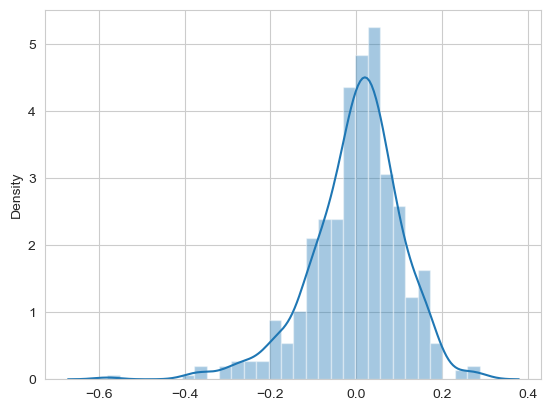

In [139]:
y_train_pred = lr_model.predict(X_train_sm)
res = y_train - y_train_pred
sns.distplot(res)

In [140]:
# Mean of Residuals
(y_train-y_train_pred).mean()

1.6111372591084002e-16

(array([  1.,   0.,   4.,  11.,  25.,  81., 170., 160.,  50.,   5.]),
 array([-0.58073859, -0.49386218, -0.40698576, -0.32010935, -0.23323293,
        -0.14635652, -0.0594801 ,  0.02739631,  0.11427273,  0.20114914,
         0.28802556]),
 <BarContainer object of 10 artists>)

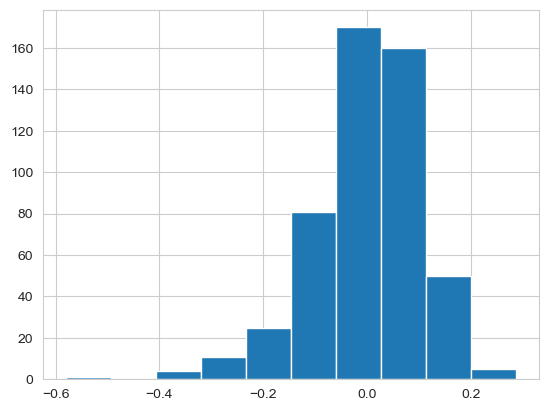

In [160]:
plt.hist(res)

In [157]:
res.head()

641    0.142216
728   -0.122084
478   -0.116950
113    0.098561
685   -0.012853
dtype: float64

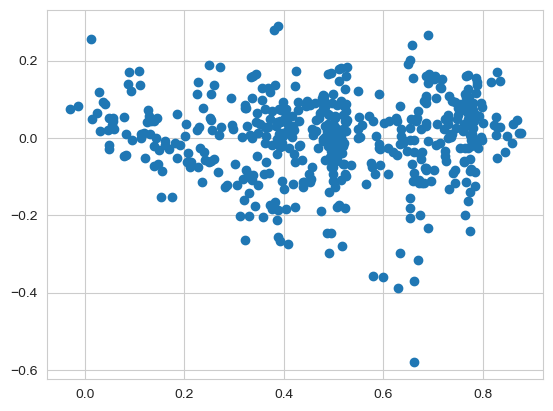

In [166]:
#look for patterns in residuals (we should not be able to identify)
plt.scatter(y_train_pred, res)
plt.show()

- Residual errors follow a normal distribution with mean=0
- Variance of Errors doesnt follow any trends
- Residual errors are independent of each other since the Predicted values vs Residuals plot doesn't show any trend.
- We can see there is no specific Pattern observed in the Error Terms with respect to Prediction, hence we can say Error terms are independent of each other!

# Predictions and Evaluations of the test set

In [143]:
#Scale the test set
#temp, hum, windspeed and cnt

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
num_vars=['temp','hum','windspeed','cnt']
data_set_test[num_vars] = scaler.fit_transform(data_set_test[num_vars])
data_set_test.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  spring  \
242   0        0           1  0.744235  0.485294   0.107980  0.587928       0   
493   1        0           1  0.635729  0.691765   0.458214  0.544505       0   
590   1        0           1  0.837241  0.610589   0.333851  0.807717       0   
488   1        0           1  0.705483  0.679412   0.317482  0.745575       0   
151   0        0           1  0.887065  0.597058   0.433685  0.449892       0   

     summer  winter  ...  may  november  october  september  monday  saturday  \
242       0       0  ...    0         0        0          0       0         0   
493       1       0  ...    1         0        0          0       0         0   
590       0       0  ...    0         0        0          0       0         0   
488       1       0  ...    1         0        0          0       0         0   
151       1       0  ...    0         0        0          0       0         0   

     sunday  thursday  tuesday  wednesday  
242       0         0        0          1  
493       0         0        0          1  
590       0         0        1          0  
488       0         0        0          0  
151       0         0        0          1  

[5 rows x 29 columns]

In [144]:
data_set_test.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  218.000000  218.000000  218.000000  218.000000  218.000000  218.000000   
mean     0.486239    0.036697    0.683486    0.544903    0.528839    0.381527   
std      0.500961    0.188450    0.466186    0.247084    0.191946    0.211580   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.342319    0.386502    0.231165   
50%      0.000000    0.000000    1.000000    0.553796    0.539412    0.339572   
75%      1.000000    0.000000    1.000000    0.773022    0.671176    0.502443   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt      spring      summer      winter  ...         may  \
count  218.000000  218.000000  218.000000  218.000000  ...  218.000000   
mean     0.519008    0.238532    0.284404    0.220183  ...    0.073394   
std      0.232943    0.427167    0.452168    0.415324  ...    0.261383   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.362950    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.529416    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.674201    0.000000    1.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

         november     october   september     monday    saturday      sunday  \
count  218.000000  218.000000  218.000000  218.00000  218.000000  218.000000   
mean     0.055046    0.096330    0.073394    0.12844    0.146789    0.133028   
std      0.228595    0.295723    0.261383    0.33535    0.354710    0.340386   
min      0.000000    0.000000    0.000000    0.00000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.00000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.00000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.00000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.00000    1.000000    1.000000   

         thursday     tuesday   wednesday  
count  218.000000  218.000000  218.000000  
mean     0.142202    0.151376    0.174312  
std      0.350061    0.359240    0.380251  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 29 columns]

In [146]:
#X and Y spit

y_test = data_set_test.pop('cnt')
X_test = data_set_test

In [147]:
#add a constant for OLS
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

const  yr  holiday  workingday      temp       hum  windspeed  spring  \
242    1.0   0        0           1  0.744235  0.485294   0.107980       0   
493    1.0   1        0           1  0.635729  0.691765   0.458214       0   
590    1.0   1        0           1  0.837241  0.610589   0.333851       0   
488    1.0   1        0           1  0.705483  0.679412   0.317482       0   
151    1.0   0        0           1  0.887065  0.597058   0.433685       0   

     summer  winter  ...  may  november  october  september  monday  saturday  \
242       0       0  ...    0         0        0          0       0         0   
493       1       0  ...    1         0        0          0       0         0   
590       0       0  ...    0         0        0          0       0         0   
488       1       0  ...    1         0        0          0       0         0   
151       1       0  ...    0         0        0          0       0         0   

     sunday  thursday  tuesday  wednesday  
242       0         0        0          1  
493       0         0        0          1  
590       0         0        1          0  
488       0         0        0          0  
151       0         0        0          1  

[5 rows x 29 columns]

In [148]:
#drop all the variables that were removed in training set 

X_test_sm = X_test_sm.drop(['wednesday','june','holiday','august','october'
,'march','summer','sunday','thursday','tuesday','monday','february','temp',
'hum','may','winter','july'], axis = 1)

In [149]:
X_test_sm.head()

const  yr  workingday  windspeed  spring  \
242    1.0   0           1   0.107980       0   
493    1.0   1           1   0.458214       0   
590    1.0   1           1   0.333851       0   
488    1.0   1           1   0.317482       0   
151    1.0   0           1   0.433685       0   

     Light rain_Light snow_Thunderstorm  Mist_cloudy  december  january  \
242                                   0            0         0        0   
493                                   0            1         0        0   
590                                   0            0         0        0   
488                                   0            0         0        0   
151                                   0            1         0        0   

     november  september  saturday  
242         0          0         0  
493         0          0         0  
590         0          0         0  
488         0          0         0  
151         0          0         0

In [150]:
#Predict 

y_test_pred = lr_model.predict(X_test_sm)

In [151]:
#evaluate the model 

r2_score(y_true = y_test, y_pred = y_test_pred)

0.7787307267178826

Our Model has predicted a R Square value of 79 percent for the test set. This value is descent and acceptable. 

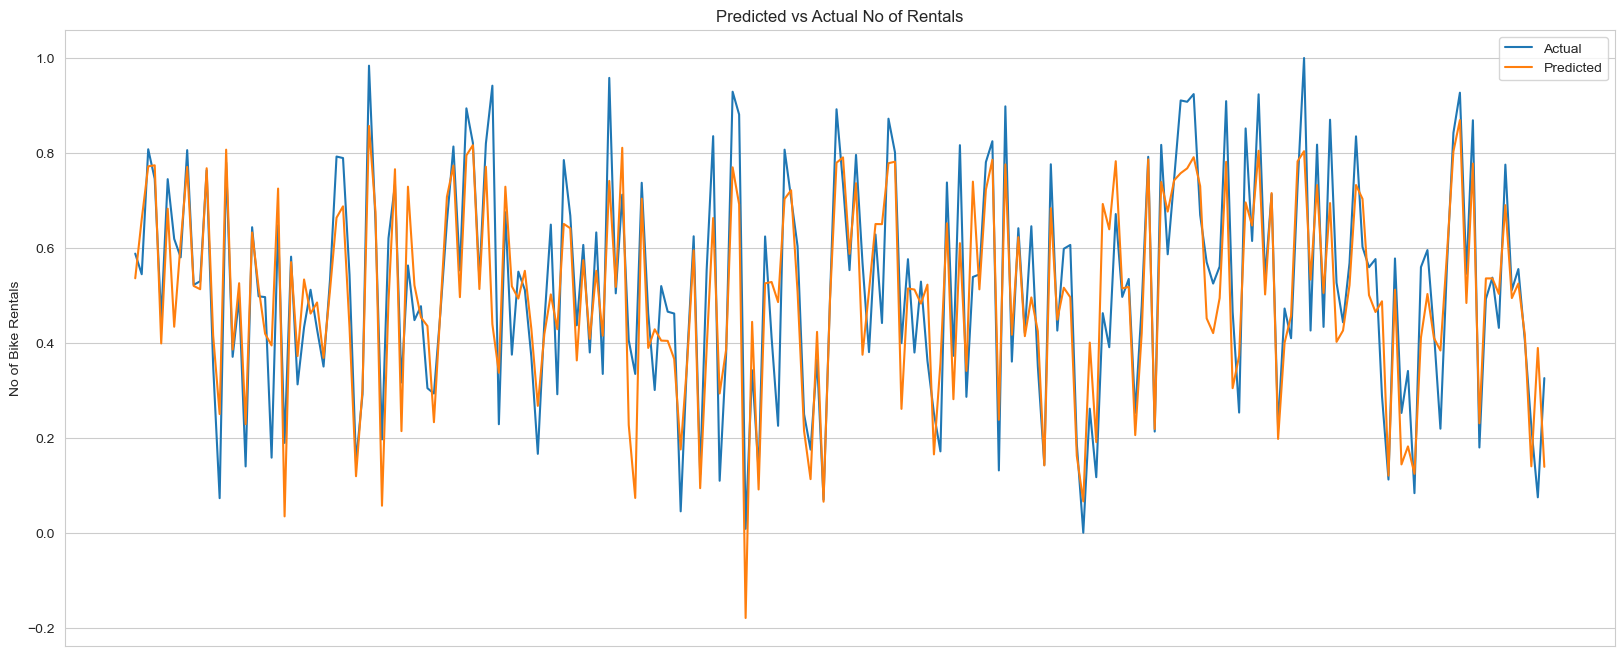

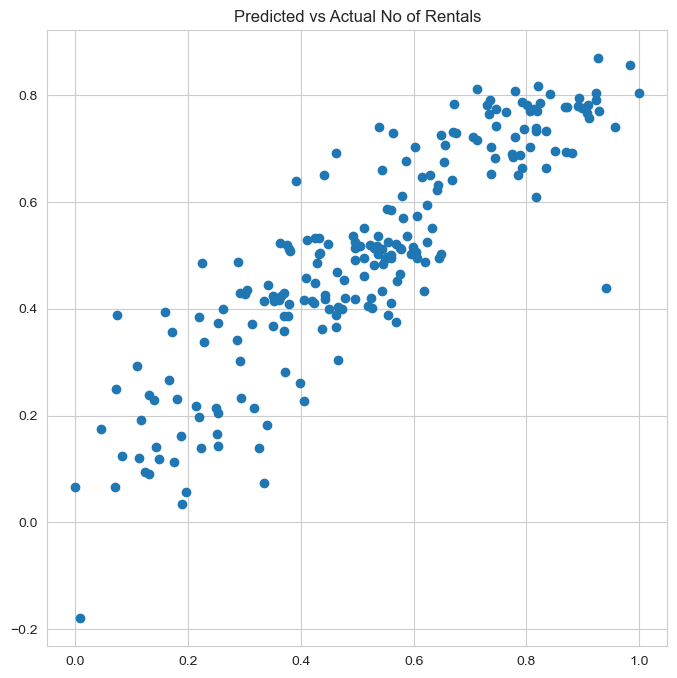

In [153]:
# Plotting Actual vs Predicted No of rentals 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_test_pred)),y_test_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of Rentals');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()

plt.figure(figsize=[8,8])
plt.scatter(y_test,y_test_pred);
plt.title('Predicted vs Actual No of Rentals');

Based on the overlap we see on the plot, we can conclude that our model is able to predict the demand of the bikes to a very good extent. 

# Conclusion


We carried out the analysis using the techique of elimation of variables with OLS method. Our training model resulted in a R square value of almost 80 percent which is acceptable. Which concludes that, almost 80 percent of the data of cnt present in the training set is explained by our independent variables. 

The final relationship between demand and predictors is as follows.

cnt = 0.5029 + 0.2650*yr + 0.0470*workingday + (-0.1292)*windspeed + (-0.2602)*spring + (-0.2759)*Light rain_Light snow_Thunderstorm + (-0.0952)*Mist_cloudy + (-0.1196)*december + (-0.1079)*january + (-0.1290)*november + (0.0800)*september + 0.0500*saturday. 

where 'temp','hum','windspeed' and 'cnt' are normalized.

Our test data set has returned a R Square of 79 percent, which states 79 percent of the data present in test set is explained by the model we have created. This is a descent result to achieve. 

Note :

Data has been cleaned to drop outliers that might affect the model adversely
The model has been verified for Multicollinearity effects
Residual Analysis has been carried out and the model satisfies the assumptions of Ordinary Least Squares approach
Q-Q plot between residual distribution and normal distribution shows that residuals follow a normal distribution for all interpolations. 
